- [Préparation des données](#Préparation-des-données)
    - [Concaténation et pivot](#Concaténation-et-pivot)
    - [Valeurs manquantes](#Valeurs-manquantes)
    - [Geoplot](#Geoplot)
    
- [Classification hiérarchique](#Classification-hiérarchique)
    - [Corrélations](#Corrélations)
    - [Normalisation des variables](#Normalisation-des-variables)
    - [ACP à 2 composants](#ACP-à-2-composants)
    - [Dendrogramme et clusters](#Dendrogramme-et-clusters)
    -[Heatmap_1](#Heatmap_1)
    - [Centroïdes](#Centroïdes)
    
- [Choix du cluster](#Choix-du-cluster)
    - [5 groupes, par import export](#5-groupes,-par-import-export)
    - [4 groupes, par indicateurs de PIB](#4-groupes,-par-indicateurs-de-PIB)
    - [3 groupes, par indicateurs démographiques](#3-groupes,-par-indicateurs-démographiques)
    
- [Clustering par la méthode Kmeans](#Clustering-par-la-méthode-Kmeans)

    - [Choix du cluster](#Choix-du-cluster)
    - [5 groupes, par import export](#5-groupes,-par-import-export)
    - [4 groupes, par indicateurs de PIB](#4-groupes,-par-indicateurs-de-PIB)
    - [3 groupes, par indicateurs démographiques](#3-groupes,-par-indicateurs-démographiques)
    - [Heatmap_2](#Heatmap_2)
    
- [Comparaison des deux méthodes de clustering](#Comparaison-des-deux-méthodes-de-clustering)
    - [Conclusion](#Conclusion)
    

In [2318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn as sk
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

In [2319]:
dispo_poultry=pd.read_csv("poultry_stock.csv")
pop_annual=pd.read_csv("population_2007-2017.csv")
pib=pd.read_csv("ppa.csv")
political_stability=pd.read_csv("political_stability.csv")
# Liste des colonnes non nécessaires qu'on supprimera à l'importation
drop_columns = ['Domain Code', 'Element Code', 'Item Code', 'Flag', 'Flag Description', 'Year Code']

## Préparation des données

### Disponibilité aliementaire (volaille ) en 2017

In [2320]:
dispo_poultry=pd.read_csv("poultry_stock.csv").drop(drop_columns,axis=1)

dispo_poultry.head()


,Domain,Area Code (FAO),Area,Element,Item,Year,Unit,Value
0,Food Balances (2010-),2,Afghanistan,Production,Poultry Meat,2017,1000 tonnes,28.00
1,Food Balances (2010-),2,Afghanistan,Import Quantity,Poultry Meat,2017,1000 tonnes,29.00
2,Food Balances (2010-),2,Afghanistan,Domestic supply quantity,Poultry Meat,2017,1000 tonnes,64.00
3,Food Balances (2010-),2,Afghanistan,Food supply quantity (kg/capita/yr),Poultry Meat,2017,kg,1.76
4,Food Balances (2010-),2,Afghanistan,Food supply (kcal/capita/day),Poultry Meat,2017,kcal/capita/day,6.00


### La population en 2007 et 2017

In [2321]:
pop_annual=pd.read_csv("population_2007-2017.csv").drop(drop_columns,axis=1)

pop_annual.head()

,Domain,Area Code (FAO),Area,Element,Item,Year,Unit,Value,Note
0,Annual population,2,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,2007,1000 persons,27100.536,NaN
1,Annual population,2,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,2017,1000 persons,36296.113,NaN
2,Annual population,3,Albania,Total Population - Both sexes,Population - Est. & Proj.,2007,1000 persons,3033.998,NaN
3,Annual population,3,Albania,Total Population - Both sexes,Population - Est. & Proj.,2017,1000 persons,2884.169,NaN
4,Annual population,4,Algeria,Total Population - Both sexes,Population - Est. & Proj.,2007,1000 persons,34166.972,NaN


### Le PIB en 2007 et 2017

In [2322]:
pib=pd.read_csv("ppa.csv").drop(drop_columns,axis=1)

pib.head()

,Domain,Area Code (FAO),Area,Element,Item,Year,Unit,Value,Note
0,Suite of Food Security Indicators,2,Afghanistan,Value,"Gross domestic product per capita, PPP, dissem...",2007,I$,1460.8,NaN
1,Suite of Food Security Indicators,2,Afghanistan,Value,"Gross domestic product per capita, PPP, dissem...",2017,I$,2058.4,NaN
2,Suite of Food Security Indicators,3,Albania,Value,"Gross domestic product per capita, PPP, dissem...",2007,I$,9150.5,NaN
3,Suite of Food Security Indicators,3,Albania,Value,"Gross domestic product per capita, PPP, dissem...",2017,I$,12771.0,NaN
4,Suite of Food Security Indicators,4,Algeria,Value,"Gross domestic product per capita, PPP, dissem...",2007,I$,10717.8,NaN


### La stabilité politique en 2017

In [2323]:
political_stability=pd.read_csv("political_stability.csv").drop(drop_columns,axis=1)

political_stability.head()

,Domain,Area Code (FAO),Area,Element,Item,Year,Unit,Value,Note
0,Suite of Food Security Indicators,2,Afghanistan,Value,Political stability and absence of violence/te...,2017,index,-2.80,NaN
1,Suite of Food Security Indicators,3,Albania,Value,Political stability and absence of violence/te...,2017,index,0.38,NaN
2,Suite of Food Security Indicators,4,Algeria,Value,Political stability and absence of violence/te...,2017,index,-0.92,NaN
3,Suite of Food Security Indicators,5,American Samoa,Value,Political stability and absence of violence/te...,2017,index,1.22,NaN
4,Suite of Food Security Indicators,6,Andorra,Value,Political stability and absence of violence/te...,2017,index,1.42,NaN


In [2324]:
def doublons(df): # Nombre de doublons dans la dataframe
    print(len(df) - len(df.drop_duplicates()), 'doublons')

for i in [dispo_poultry,pib,political_stability,pop_annual]:
    doublons(i)

0 doublons
0 doublons
0 doublons
0 doublons


###  Concaténation et pivot

In [2325]:
data=pd.concat([dispo_poultry,pop_annual,pib,political_stability])

In [2326]:
# Table pivot
data = data.pivot_table(index='Area', values='Value', columns=['Element', 'Item', 'Year']).reset_index()
data

Element                       Area Domestic supply quantity Export Quantity  \
Item                                           Poultry Meat    Poultry Meat   
Year                                                   2017            2017   
0                      Afghanistan                     64.0             NaN   
1                          Albania                     33.0             0.0   
2                          Algeria                    286.0             0.0   
3                   American Samoa                      NaN             NaN   
4                          Andorra                      NaN             NaN   
..                             ...                      ...             ...   
233      Wallis and Futuna Islands                      NaN             NaN   
234                 Western Sahara                      NaN             NaN   
235                          Yemen                    253.0             0.0   
236                         Zambia                     60.0             1.0   
237                       Zimbabwe                     75.0             NaN   

Element Food supply (kcal/capita/day) Food supply quantity (kg/capita/yr)  \
Item                     Poultry Meat                        Poultry Meat   
Year                             2017                                2017   
0                                 6.0                                1.76   
1                                59.0                               11.45   
2                                24.0                                6.91   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   
..                                ...                                 ...   
233                               NaN                                 NaN   
234                               NaN                                 NaN   
235                              32.0                                9.08   
236                              12.0                                3.58   
237                              18.0                                5.27   

Element Import Quantity   Production Protein supply quantity (g/capita/day)  \
Item       Poultry Meat Poultry Meat                           Poultry Meat   
Year               2017         2017                                   2017   
0                  29.0         28.0                                   0.63   
1                  20.0         13.0                                   4.44   
2                   2.0        284.0                                   2.13   
3                   NaN          NaN                                    NaN   
4                   NaN          NaN                                    NaN   
..                  ...          ...                                    ...   
233                 NaN          NaN                                    NaN   
234                 NaN          NaN                                    NaN   
235                82.0        171.0                                   3.24   
236                12.0         49.0                                   1.21   
237                 6.0         69.0                                   1.78   

Element Total Population - Both sexes             \
Item        Population - Est. & Proj.              
Year                             2007       2017   
0                           27100.536  36296.113   
1                            3033.998   2884.169   
2                           34166.972  41389.189   
3                              58.365     55.620   
4                              82.684     77.001   
..                                ...        ...   
233                            14.132     11.900   
234                           462.207    552.615   
235                         21282.515  27834.819   
236                         12502.958  16853.599   
237                         122

In [2327]:
data.shape

(238, 13)

In [2328]:
data.columns

MultiIndex([(                                  'Area', ...),
            (              'Domestic supply quantity', ...),
            (                       'Export Quantity', ...),
            (         'Food supply (kcal/capita/day)', ...),
            (   'Food supply quantity (kg/capita/yr)', ...),
            (                       'Import Quantity', ...),
            (                            'Production', ...),
            ('Protein supply quantity (g/capita/day)', ...),
            (         'Total Population - Both sexes', ...),
            (         'Total Population - Both sexes', ...),
            (                                 'Value', ...),
            (                                 'Value', ...),
            (                                 'Value', ...)],
           names=['Element', 'Item', 'Year'])

### Création d'une nouvelle dataframe pour n'y conserver que les variables utiles

In [2329]:
annee_a, annee_b = 2007, 2017

# Nouvelles variables
df = pd.DataFrame()
df['pays'] = data['Area']
df['dispo_calories'] = data["Food supply (kcal/capita/day)"]["Poultry Meat"][annee_b]
df['dispo_proteines'] =data["Protein supply quantity (g/capita/day)"]["Poultry Meat"][annee_b] 
df['dispo_int']=data["Domestic supply quantity"]["Poultry Meat"][annee_b] 
df['dispo_kg']=data["Food supply quantity (kg/capita/yr)"]["Poultry Meat"][annee_b] 
                                                             
df['population'] = data["Total Population - Both sexes"]["Population - Est. & Proj."][annee_b] / 1000 # Millions d'habitants                                                       
df['population_croissance'] = data["Total Population - Both sexes"]["Population - Est. & Proj."][annee_b] /data["Total Population - Both sexes"]["Population - Est. & Proj."][annee_a]                                                              
df['pib'] = data["Value"]["Gross domestic product per capita, PPP, dissemination (constant 2011 international $)"][annee_b]
                                                                                                                                    
df['pib_croissance'] = data["Value"]["Gross domestic product per capita, PPP, dissemination (constant 2011 international $)"][annee_b]/ data["Value"]["Gross domestic product per capita, PPP, dissemination (constant 2011 international $)"][annee_a]
                                                                  
df['poulet_import-export'] = data["Export Quantity"]["Poultry Meat"][annee_b]-data["Import Quantity"]["Poultry Meat"][annee_b]
#print(df) 
#df['stabilité politique']=data["Value"]["Political stability and absence of violence/terrorism (index)"][annee_b]
df


,pays,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export
0,Afghanistan,6.0,0.63,64.0,1.76,36.296113,1.339313,2058.4,1.409091,NaN
1,Albania,59.0,4.44,33.0,11.45,2.884169,0.950617,12771.0,1.395661,-20.0
2,Algeria,24.0,2.13,286.0,6.91,41.389189,1.211380,11737.4,1.095131,-2.0
3,American Samoa,NaN,NaN,NaN,NaN,0.055620,0.952968,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,0.077001,0.931268,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
233,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,0.011900,0.842061,NaN,NaN,NaN
234,Western Sahara,NaN,NaN,NaN,NaN,0.552615,1.195601,NaN,NaN,NaN
235,Yemen,32.0,3.24,253.0,9.08,27.834819,1.307873,NaN,NaN,-82.0
236,Zambia,12.0,1.21,60.0,3.58,16.853599,1.347969,3485.0,1.330305,-11.0


In [2330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pays                   238 non-null    object 
 1   dispo_calories         180 non-null    float64
 2   dispo_proteines        180 non-null    float64
 3   dispo_int              180 non-null    float64
 4   dispo_kg               180 non-null    float64
 5   population             237 non-null    float64
 6   population_croissance  230 non-null    float64
 7   pib                    187 non-null    float64
 8   pib_croissance         185 non-null    float64
 9   poulet_import-export   141 non-null    float64
dtypes: float64(9), object(1)
memory usage: 18.7+ KB


In [2331]:
df.describe(include='all')

,pays,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export
count,238,180.000000,180.000000,180.000000,180.000000,237.000000,230.000000,187.000000,185.000000,141.000000
unique,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,74.655556,7.132556,767.950000,20.182944,37.977888,1.145616,20770.873262,1.210555,22.595745
std,NaN,61.834644,5.690094,2606.088259,16.008717,160.742822,0.165316,22042.251121,0.271327,513.927482
min,NaN,1.000000,0.140000,2.000000,0.410000,0.000793,0.842061,773.600000,0.605661,-1059.000000
25%,NaN,23.750000,2.325000,28.000000,7.120000,0.381755,1.034608,4655.550000,1.036390,-48.000000
50%,NaN,63.000000,6.425000,107.000000,17.745000,5.296326,1.118799,12771.000000,1.163278,-11.000000
75%,NaN,104.000000,10.072500,331.000000,28.715000,19.653969,1.237874,28863.700000,1.330305,0.000000


### Valeurs manquantes

In [2332]:
#Remplacer les données inf et -inf par des NaN et supprimer les NaN puis  consever les données non null

df = df.replace([np.inf, -np.inf], np.nan).dropna().reset_index().drop(['index'], axis=1)
df.style.background_gradient(cmap='BrBG')


,pays,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export
0,Albania,59.000000,4.440000,33.000000,11.450000,2.884169,0.950617,12771.000000,1.395661,-20.000000
1,Algeria,24.000000,2.130000,286.000000,6.910000,41.389189,1.211380,11737.400000,1.095131,-2.000000
2,Angola,36.000000,3.630000,318.000000,10.650000,29.816766,1.426274,7310.900000,0.995778,-277.000000
3,Antigua and Barbuda,247.000000,18.750000,6.000000,57.310000,0.095426,1.135672,19840.300000,0.843884,-7.000000
4,Argentina,192.000000,14.310000,1962.000000,44.660000,43.937140,1.107167,23597.100000,1.052310,199.000000
5,Armenia,52.000000,5.210000,45.000000,15.380000,2.944791,1.004151,12115.100000,1.247899,-35.000000
6,Australia,205.000000,17.610000,1245.000000,50.630000,24.584620,1.175378,48482.600000,1.098664,26.000000
7,Austria,65.000000,7.490000,172.000000,18.200000,8.819901,1.060883,54170.000000,1.032010,-32.000000
8,Azerbaijan,44.000000,4.450000,129.000000,13.110000,9.845320,1.128501,14121.400000,1.185178,-27.000000
9,Bangladesh,7.000000,0.500000,258.000000,1.610000,159.685424,1.119340,4160.700000,1.639943,0.000000


# Geoplot

In [2333]:
import geopandas as gpd
# Dataset naturalearth_lowres
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).drop(['pop_est', 'gdp_md_est'], axis=1)
world.rename(columns={'name': 'pays'}, inplace=True)
# Harmonisation des noms de pays entre les 2 dataframes
world = world.replace('Russia', 'Russian Federation')
world = world.replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')
world = world.replace('Dominican Rep.', 'Dominican Republic')
world = world.replace('Bolivia', 'Bolivia (Plurinational State of)')
world = world.replace('Bosnia and Herz.', 'Bosnia and Herzegovina')
world = world.replace('South Korea', 'Republic of Korea')
world = world.replace('Macedonia', 'North Macedonia')
world = world.replace('China', 'China, mainland')
world = world.replace('Tanzania', 'United Republic of Tanzania')
world = world.replace('eSwatini', 'Eswatini')
world

,continent,pays,iso_a3,geometry
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...
172,Europe,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Europe,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Europe,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,North America,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [2334]:
# Pays non représentables sur la carte
map_missing = df[~df['pays'].isin(world['pays'])]
map_missing

,pays,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export
3,Antigua and Barbuda,247.0,18.75,6.0,57.31,0.095426,1.135672,19840.3,0.843884,-7.0
10,Barbados,196.0,15.03,17.0,46.04,0.286232,1.027025,15789.0,0.934045,-2.0
20,C?te d'Ivoire,7.0,0.68,49.0,2.00,24.437470,1.274694,4830.8,1.330799,-1.0
24,China,65.0,4.57,20032.0,14.09,1452.625244,1.055483,14621.2,2.077495,-295.0
25,"China, Hong Kong SAR",182.0,19.67,227.0,45.69,7.306322,1.068173,59849.2,1.220319,-244.0
26,"China, Macao SAR",140.0,11.63,21.0,33.99,0.622585,1.234037,126184.0,1.312309,-23.0
28,Comoros,55.0,5.57,13.0,16.51,0.813892,1.268495,3032.3,1.091894,-14.0
34,Democratic Republic of the Congo,5.0,0.51,119.0,1.47,81.398764,1.392534,1059.8,1.297026,-109.0
36,Dominica,174.0,13.31,4.0,40.79,0.071458,1.009365,11304.0,1.002536,-4.0
59,Iran (Islamic Republic of),95.0,9.67,2189.0,27.14,80.673883,1.130892,14535.9,1.090882,39.0


In [2335]:
# Jointure entre pays et world
df = world.merge(df.drop(map_missing.index), on='pays')
df

,continent,pays,iso_a3,geometry,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",89.0,8.62,24.0,25.63,0.877459,1.049354,13429.3,1.270078,-3.0
1,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",154.0,13.83,1431.0,38.97,36.732095,1.115433,48317.1,1.052924,-19.0
2,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",220.0,19.98,18305.0,55.80,325.084756,1.081423,60109.7,1.075823,3569.0
3,Asia,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",61.0,6.17,328.0,18.24,18.080019,1.151439,24863.0,1.274993,-168.0
4,Asia,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",7.0,0.71,67.0,2.11,31.959785,1.174789,6518.8,1.671016,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Europe,Bosnia and Herzegovina,BIH,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",63.0,6.36,63.0,18.74,3.351525,0.890703,13753.8,1.317187,-2.0
113,Europe,North Macedonia,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",68.0,7.03,41.0,19.78,2.081996,1.008023,15649.9,1.264189,-39.0
114,Europe,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",35.0,3.50,90.0,10.16,8.829628,0.970162,16611.0,1.199671,-5.0
115,Europe,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",55.0,5.78,10.0,15.97,0.627563,1.012925,19682.3,1.211345,-8.0


# Classification hiérarchique

- Un clustering hiérarchique est un ensemble de clusters imbriqués organisés en arbre.



## Corrélation

### Avant de réaliser l'ACP, on peut vérifier la corrélation des variables avec une matrice des corrélations .



#### Fortes corrélations entre :

#### - la dispo. en protéines et la dispo. en calories
####  - la dispo. en protéines et dispo_kg
#### - la stabilité politique et le PIB
#### - la dispo_kg et la dispo_calories
#### - la dispo_int et poulet_import_export

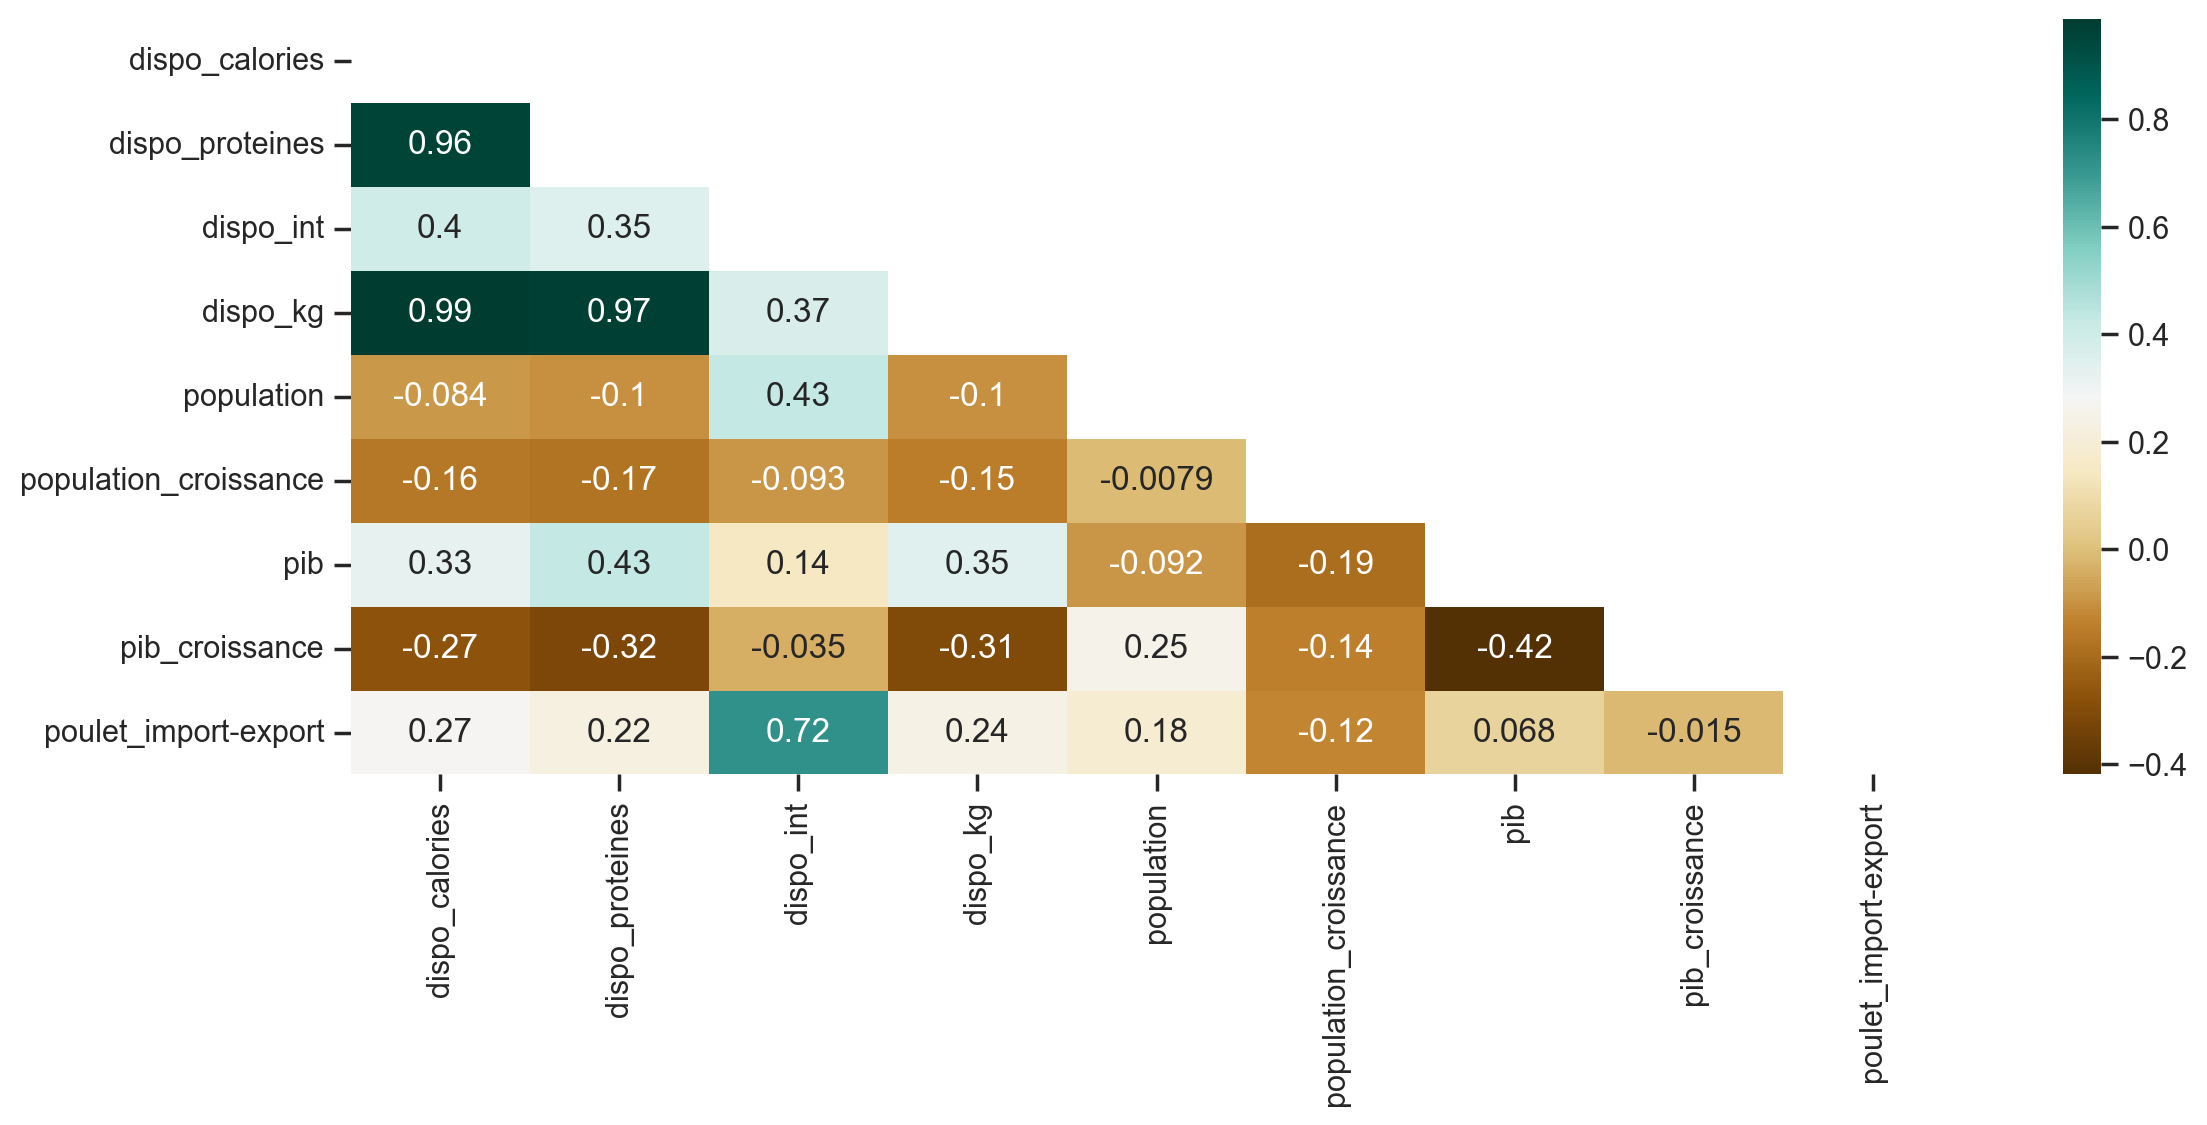

In [2336]:
# Calculate pairwise-correlation
matrix = df.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.show()

## Normalisation des variables

Les méthodes de normalisation des données sont utilisées pour que les variables, mesurées à différentes échelles, aient des valeurs comparables. Cette étape de prétraitement est importante pour le regroupement et la visualisation des heatmap, l’analyse en composantes principales et d’autres algorithmes d’apprentissage machine basés sur des mesures de distance.

In [2337]:
df.describe()

,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,77.982906,7.547436,787.547009,21.218974,44.787007,1.145180,23468.600855,1.196325,35.230769
std,53.113571,4.921641,2035.133349,13.659679,132.568583,0.156393,19965.269792,0.215122,562.418613
min,2.000000,0.240000,5.000000,0.710000,0.334393,0.873100,1163.700000,0.672863,-1059.000000
25%,39.000000,4.050000,66.000000,11.190000,4.702034,1.038512,8408.000000,1.052310,-48.000000
50%,69.000000,7.140000,178.000000,19.780000,10.513104,1.118258,16611.000000,1.164349,-11.000000
75%,104.000000,9.830000,736.000000,28.200000,37.953180,1.211380,33856.200000,1.305076,0.000000
max,233.000000,27.820000,18305.000000,67.290000,1338.676785,1.755984,112308.000000,2.005357,4220.000000


In [2338]:
# normalize() (transfo de la variable entre 0 et 1, sans la cenrter, sans changer la distribution)

# Variables à normaliser et standardiser
categorial = ['continent', 'pays', 'iso_a3', 'geometry']
variables_non_std = df.drop(categorial + ['population_croissance', 'pib_croissance'], axis=1)
X = variables_non_std.values

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

X_scaled = normalize(X)

# Réunion de toutes les variables standardisées
df_std = pd.merge(
    df.drop(variables_non_std.columns, axis=1), # Variables n'ayant pas nécessité une standardisation
    pd.DataFrame(X_scaled, columns=variables_non_std.columns), # Variables précédemment standardisées
    left_index=True, right_index=True)

df_std

,continent,pays,iso_a3,geometry,population_croissance,pib_croissance,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,pib,poulet_import-export
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.049354,1.270078,0.006627,0.000642,0.001787,0.001908,0.000065,0.999974,-0.000223
1,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.115433,1.052924,0.003186,0.000286,0.029604,0.000806,0.000760,0.999556,-0.000393
2,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.081423,1.075823,0.003496,0.000317,0.290844,0.000887,0.005165,0.955068,0.056707
3,Asia,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",1.151439,1.274993,0.002453,0.000248,0.013191,0.000734,0.000727,0.999887,-0.006756
4,Asia,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",1.174789,1.671016,0.001074,0.000109,0.010277,0.000324,0.004902,0.999934,-0.001227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Europe,Bosnia and Herzegovina,BIH,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",0.890703,1.317187,0.004580,0.000462,0.004580,0.001363,0.000244,0.999978,-0.000145
113,Europe,North Macedonia,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",1.008023,1.264189,0.004345,0.000449,0.002620,0.001264,0.000133,0.999983,-0.002492
114,Europe,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.970162,1.199671,0.002107,0.000211,0.005418,0.000612,0.000532,0.999983,-0.000301
115,Europe,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.012925,1.211345,0.002794,0.000294,0.000508,0.000811,0.000032,0.999996,-0.000406


In [2339]:
df_std.describe()

,population_croissance,pib_croissance,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,pib,poulet_import-export
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.145180,1.196325,0.005209,0.000494,0.045449,0.001440,0.005326,0.994311,-0.000642
std,0.156393,0.215122,0.005164,0.000467,0.087593,0.001393,0.018344,0.024955,0.025311
min,0.873100,0.672863,0.000577,0.000064,0.000098,0.000164,0.000005,0.803324,-0.047696
25%,1.038512,1.052310,0.002107,0.000212,0.003561,0.000589,0.000163,0.998500,-0.003156
50%,1.118258,1.164349,0.003415,0.000338,0.017214,0.000911,0.000754,0.999814,-0.000624
75%,1.211380,1.305076,0.006508,0.000592,0.041880,0.001745,0.003665,0.999979,0.000000
max,1.755984,2.005357,0.029636,0.003056,0.547658,0.008779,0.179519,1.000000,0.233399


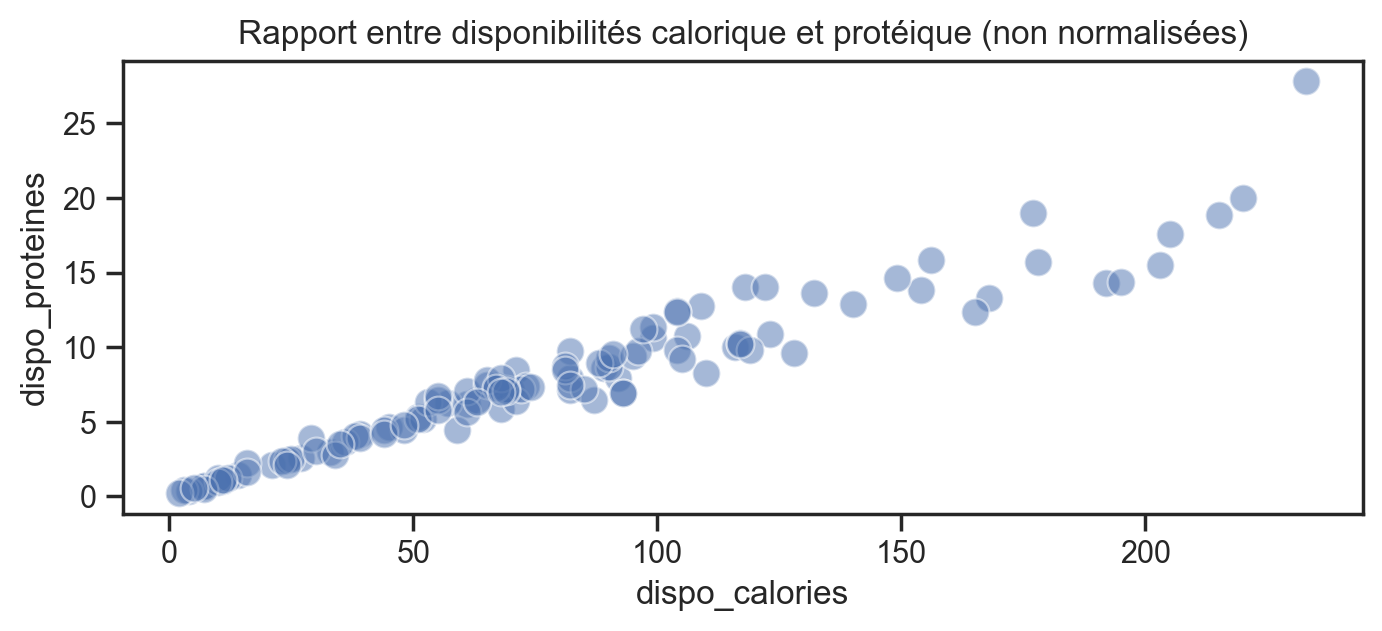

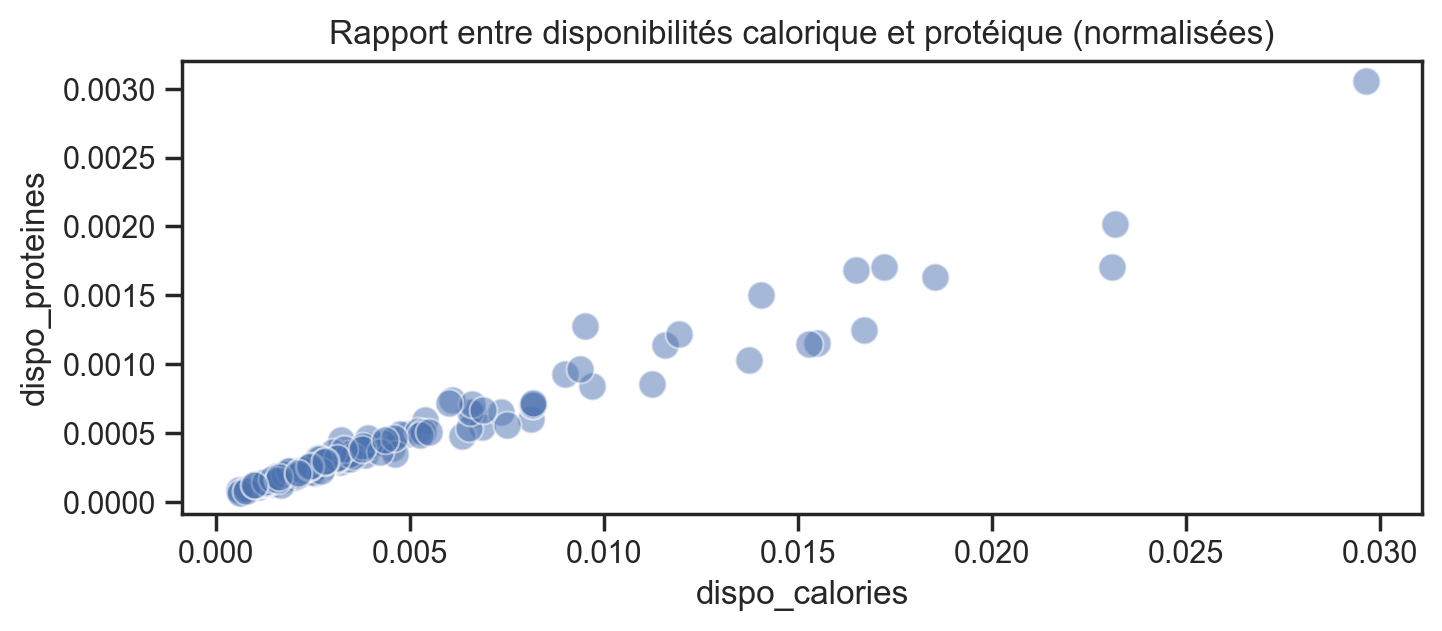

In [2340]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df, x='dispo_calories', y='dispo_proteines', s=100, alpha=.5)
plt.title('Rapport entre disponibilités calorique et protéique (non normalisées)')
plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=df_std, x='dispo_calories', y='dispo_proteines', s=100, alpha=.5)
plt.title('Rapport entre disponibilités calorique et protéique (normalisées)')
plt.show()

## ACP à 2 composants

L’ACP peut être utilisée de manière descriptive pour mieux comprendre les corrélations qui existent entre les données.  L'ACP fait partie des méthodes d’analyse factorielle qui ont pour but de simplifier nos données et réduire le nombre de variables.
- l'ACP ici va nous permettre de réduire nos 10 variables quantitatives à 2.

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


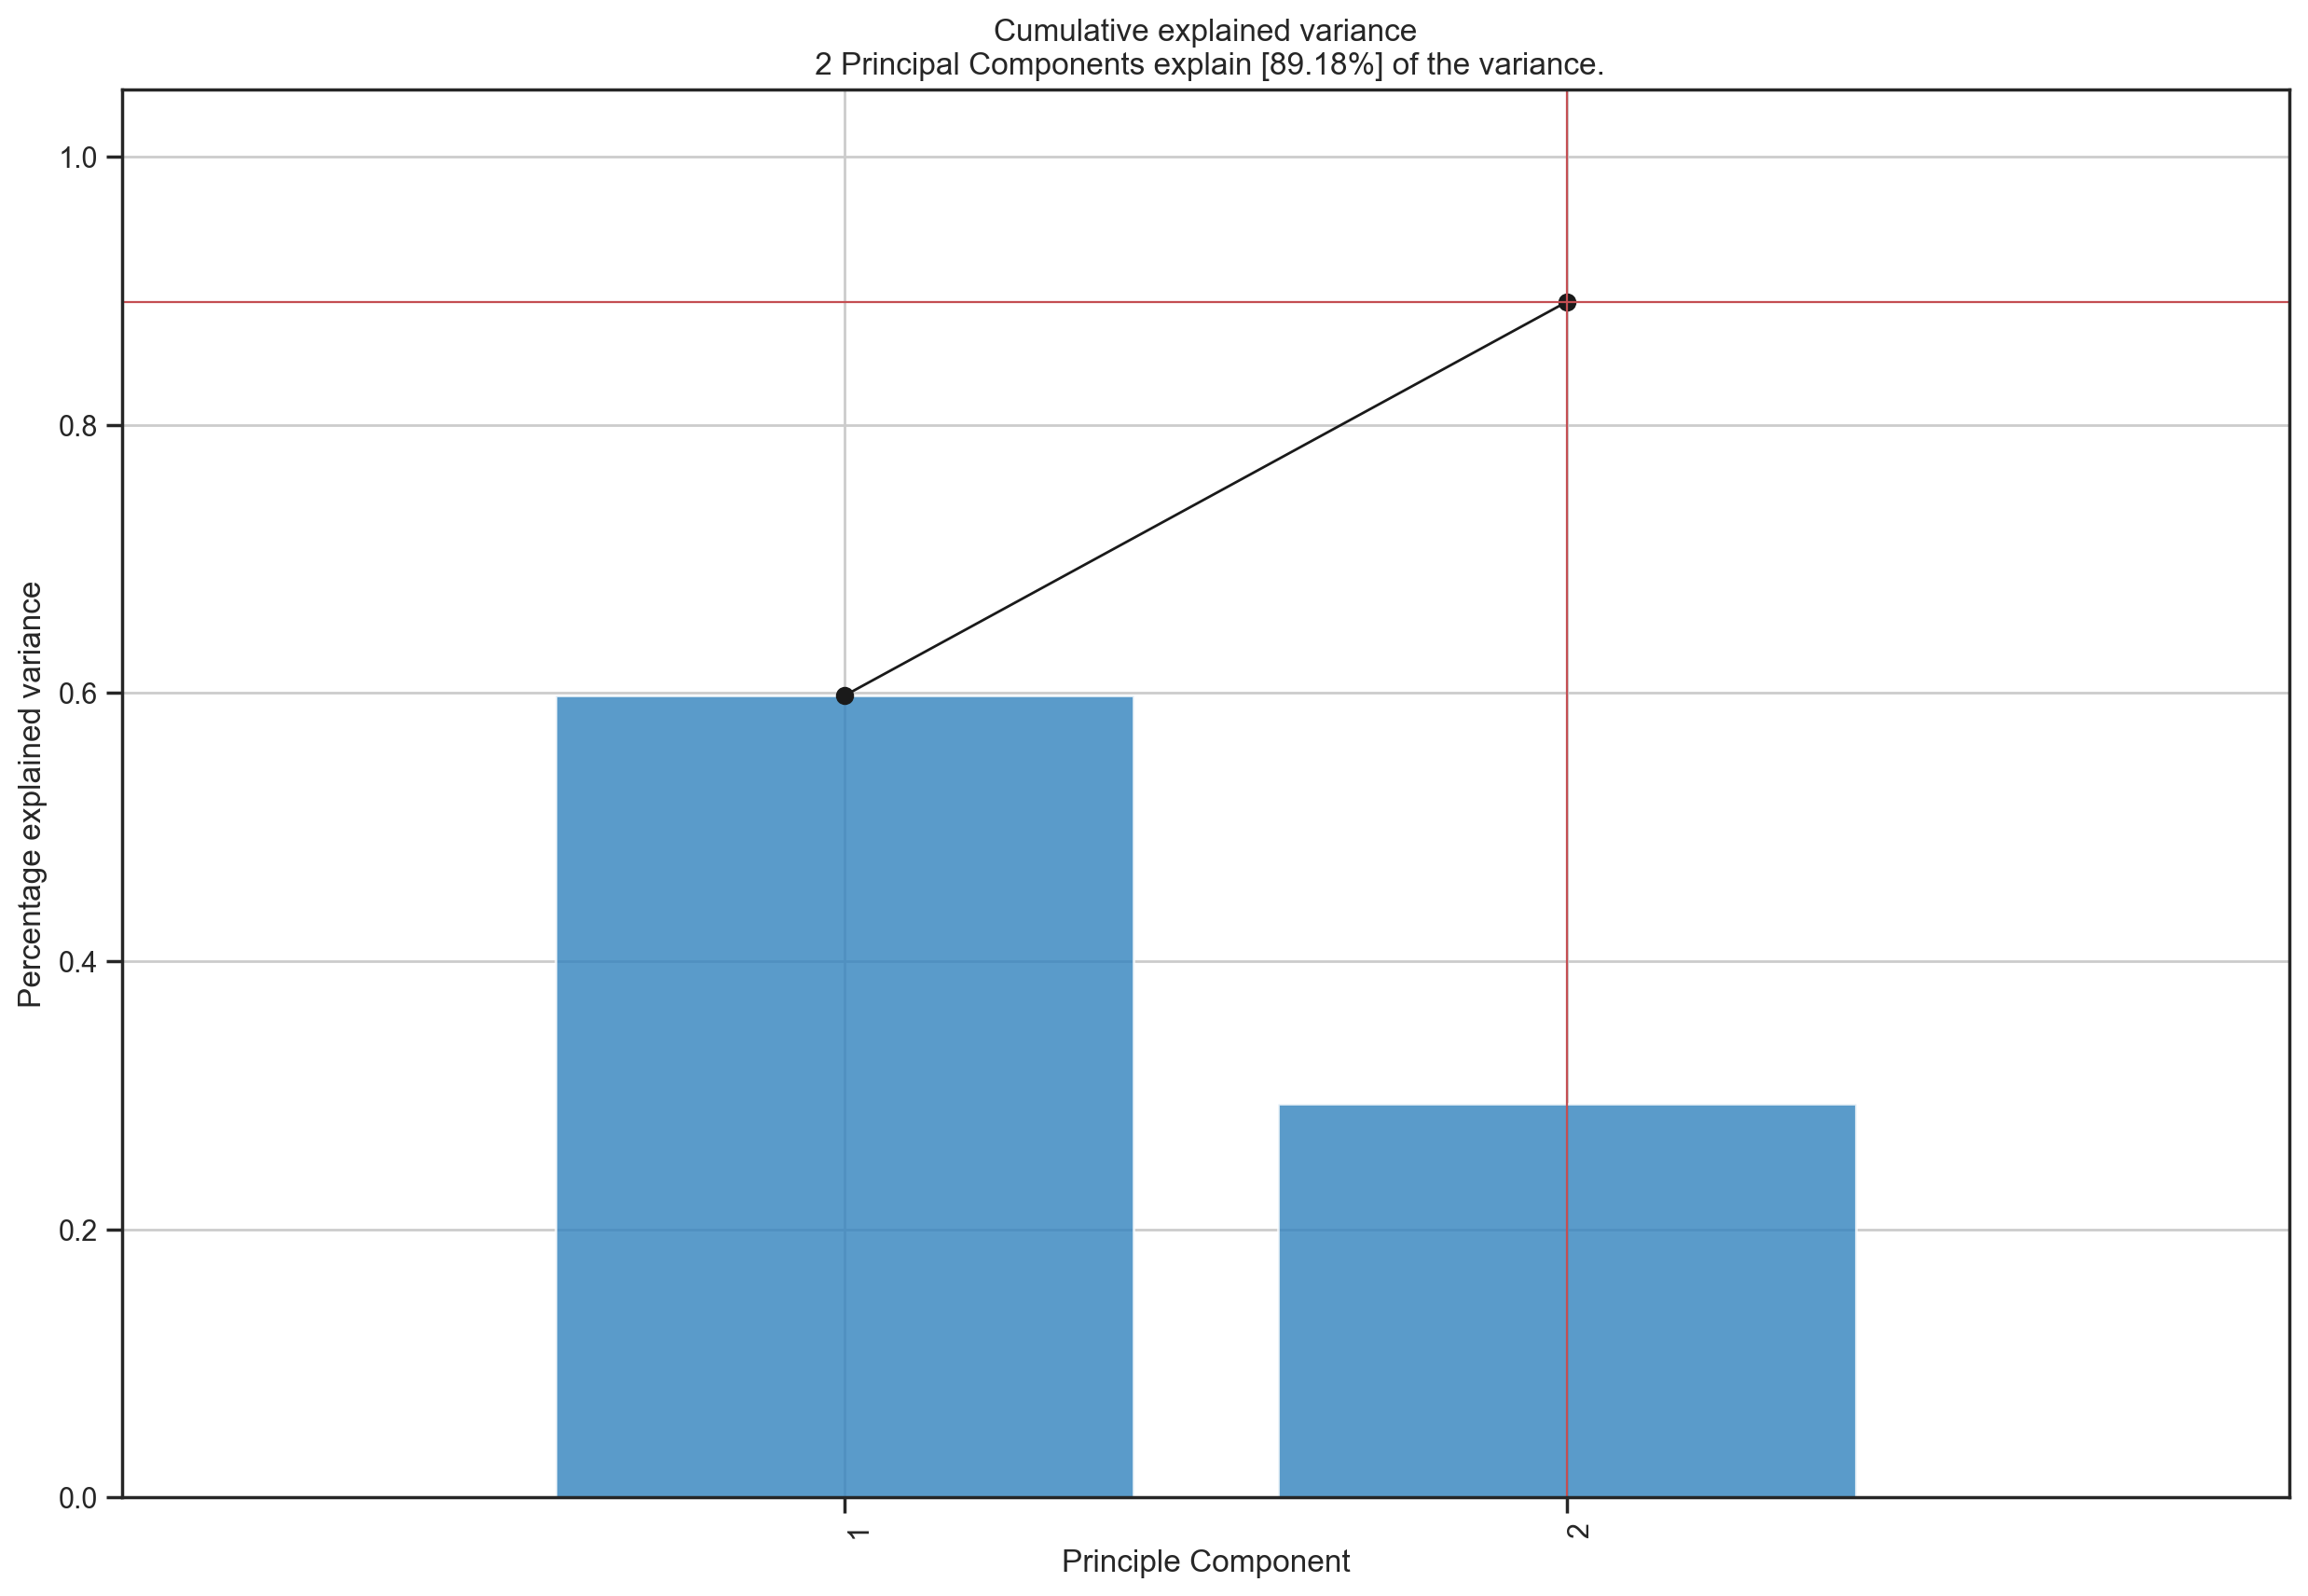

<Figure size 1600x1000 with 0 Axes>

In [2341]:
#!pip3 install requests
from pca import pca
model = pca(n_components=2)
results = model.fit_transform(df_std.drop(categorial , axis=1))
fig, ax = model.plot()
plt.show()

Le résultat le plus visuel que fournit cette méthode factorielle c’est le cercle des corrélations. On représente 2 composantes principales et on projette les variables sur ces 2 axes. Cela nous permet de comprendre quelles sont les variables qui contribuent le plus à la construction de chaque composante.

- Dans notre cas on constate que les variables population_croissance , pib_croissance contribuent le plus à la   contruction de de chaque composante

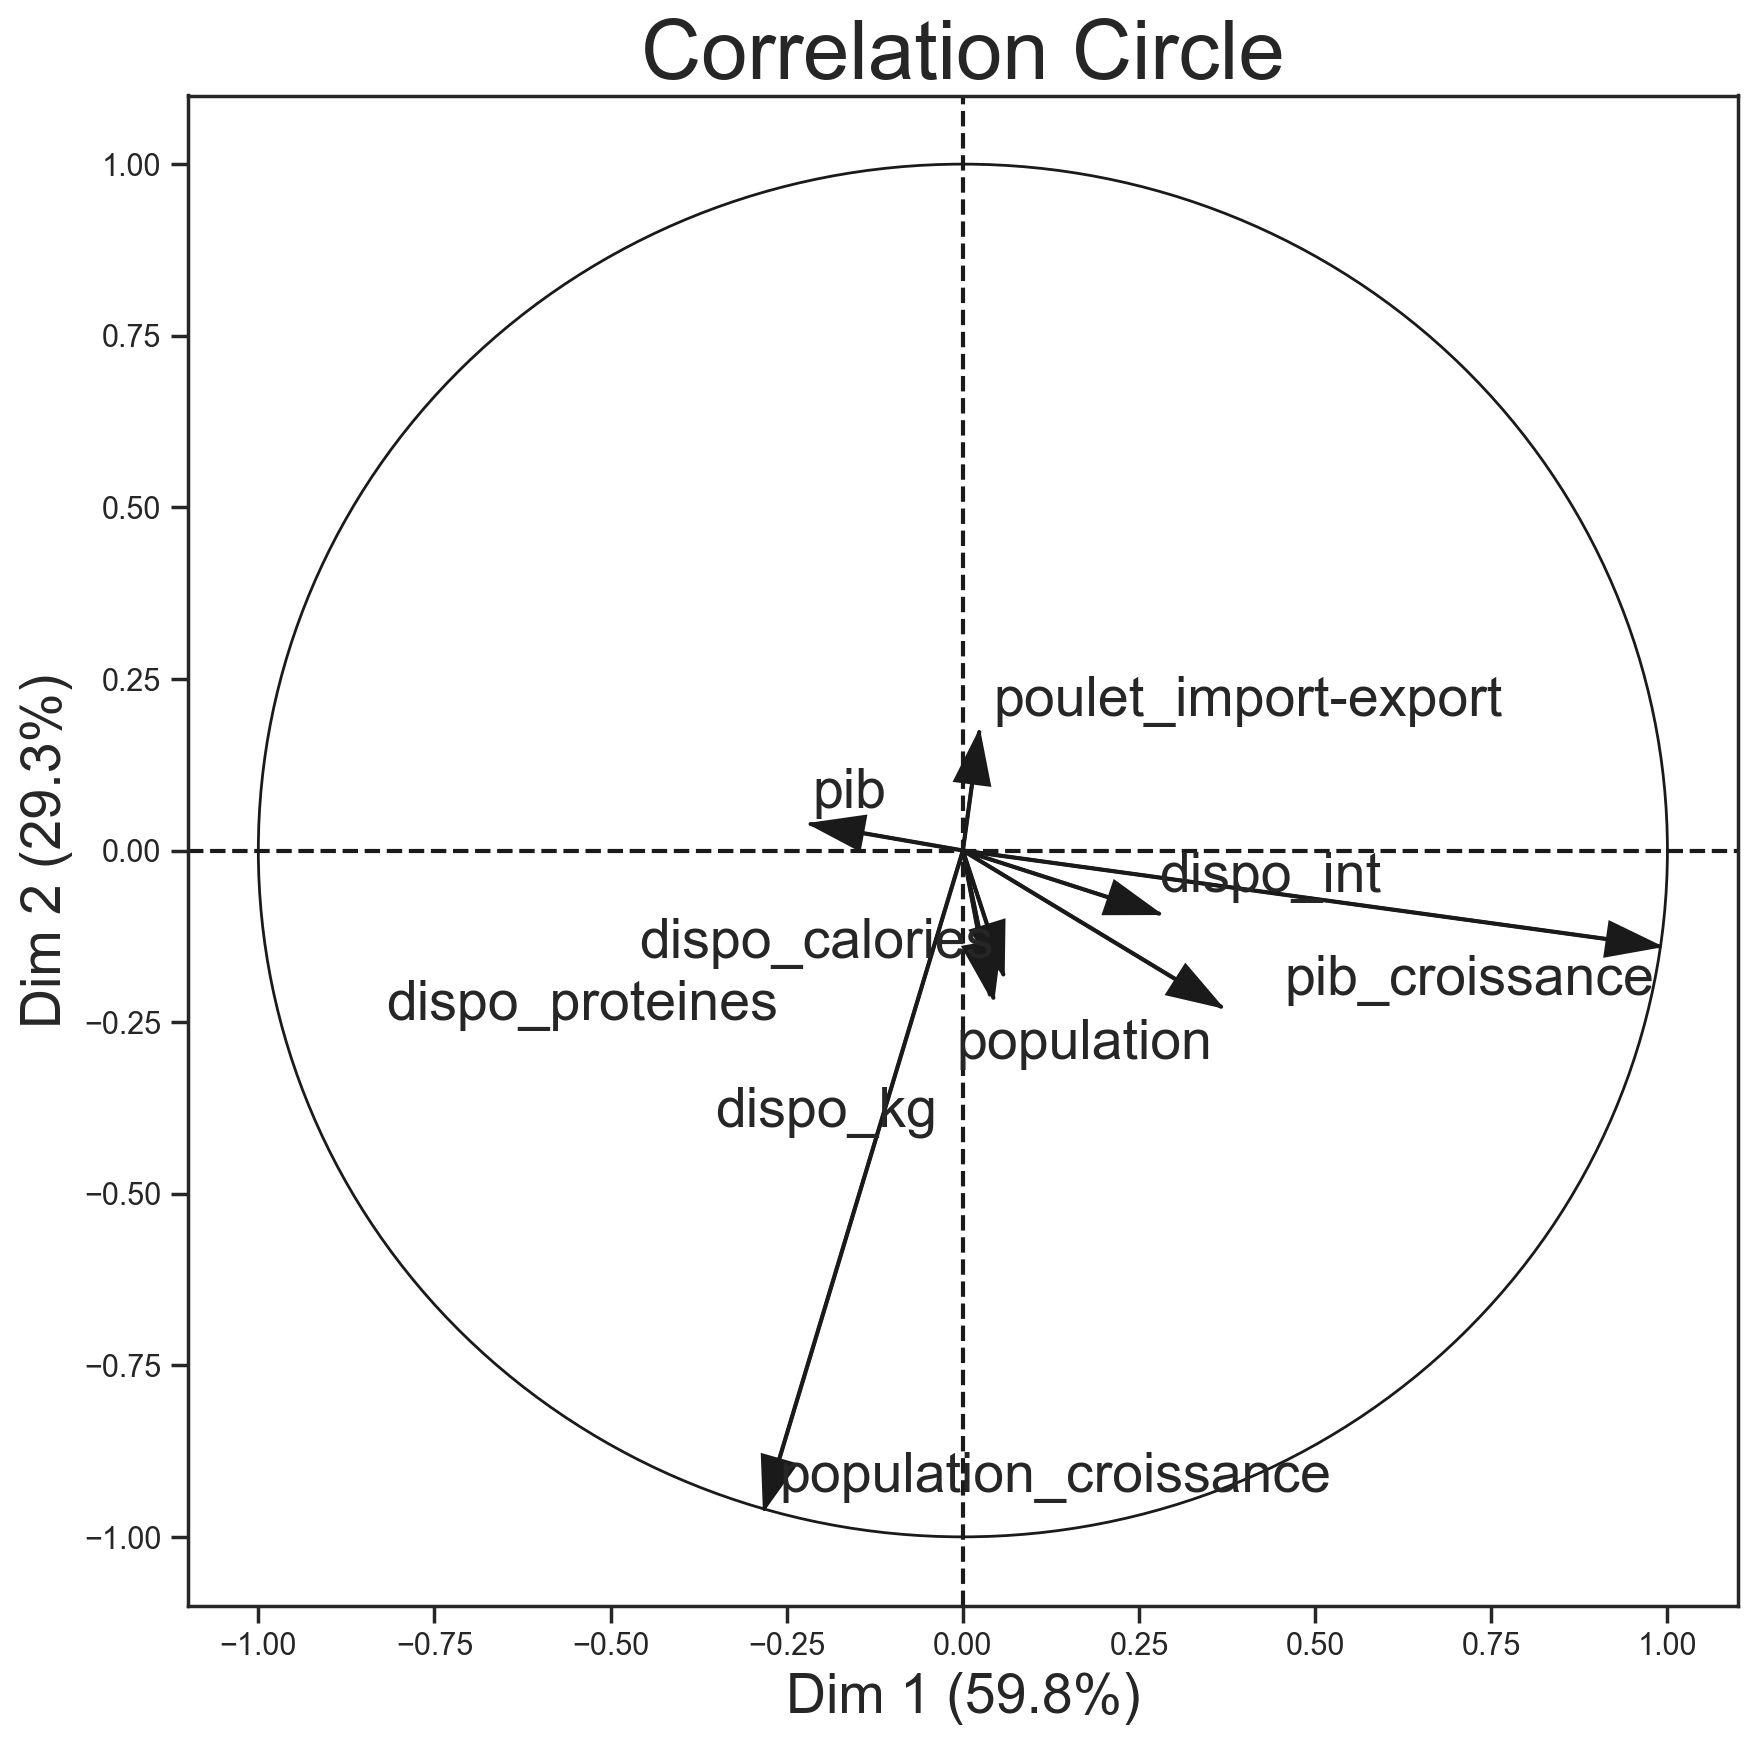

In [2342]:
from mlxtend.plotting import plot_pca_correlation_graph
figure, correlation_matrix = plot_pca_correlation_graph(df_std.drop(categorial , axis=1), 
                                                        df_std.drop(categorial , axis=1).columns.values,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

## Dendrogramme et clusters
Le Dendrogramme est donc le type de diagramme en arborescence que l’on utilise pour présenter le clustering hiérarchique, à savoir les relations entre des ensembles de données similaires.

-- Le nombre de clusters choisis = 5  

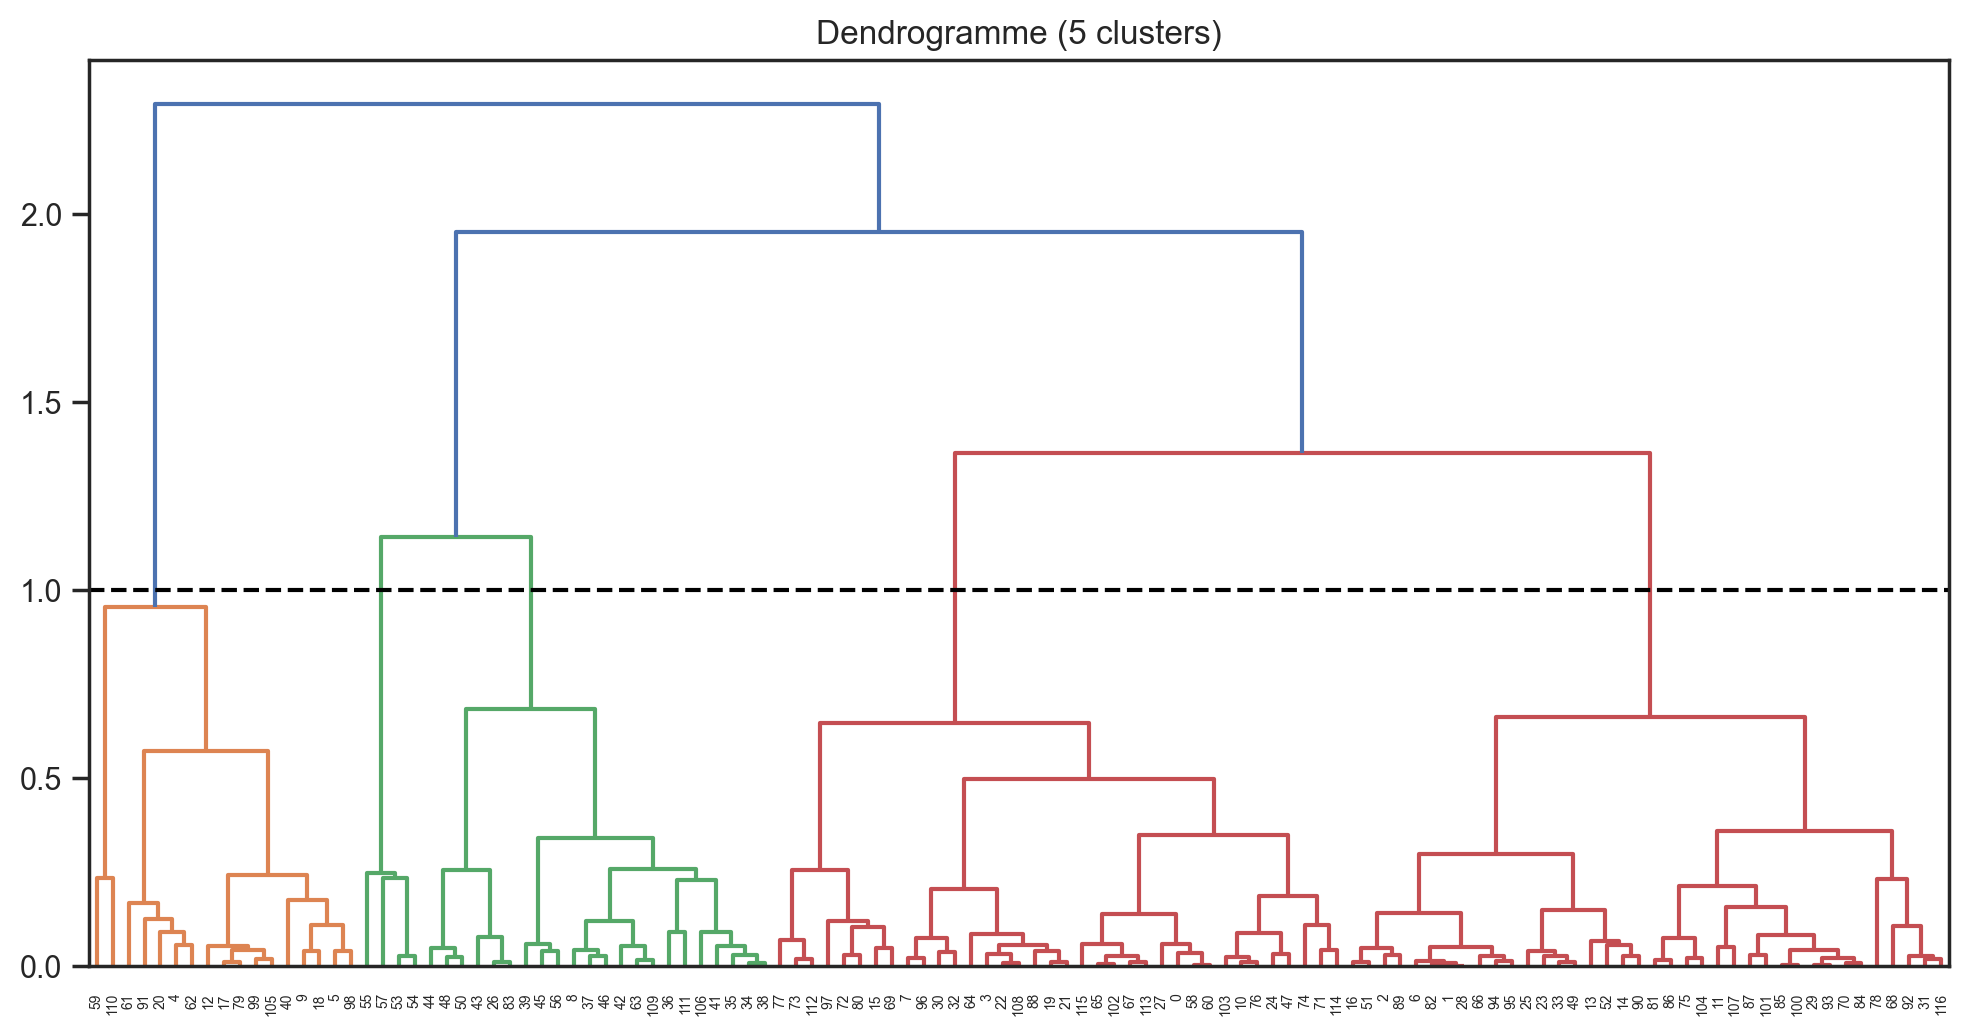

In [2343]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 6))  
shc.dendrogram(shc.linkage(results['PC'], method='ward'))
#shc.dendrogram(shc.linkage(df_std.drop(categorial , axis=1), method='ward'))
#  df_std.drop(categorial , axis=1)
plt.axhline(y=1, color='black', linestyle='dashed') # Threshold
plt.title('Dendrogramme (5 clusters)')  
plt.savefig('dendrogramme.png', dpi=300, bbox_inches='tight')
plt.show()

In [2344]:
# Récupération du cluster de chaque individu
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
clusters = pd.DataFrame(cluster.fit_predict(results['PC']), columns=['cluster'])
#clusters = pd.DataFrame(cluster.fit_predict(df_std.drop(categorial , axis=1)), columns=['cluster'])
deux_composantes = pd.merge(results['PC'], clusters, left_index=True, right_index=True)
deux_composantes = pd.merge(deux_composantes, df['pays'], left_index=True, right_index=True)
deux_composantes

,PC1,PC2,cluster,pays
0,0.085859,-0.081788,3,Fiji
1,-0.135473,-0.058199,2,Canada
2,-0.075841,-0.074486,2,United States of America
3,0.071332,0.019830,3,Kazakhstan
4,0.451498,0.120025,0,Uzbekistan
...,...,...,...,...
112,0.163954,-0.227649,3,Bosnia and Herzegovina
113,0.088549,-0.123284,3,North Macedonia
114,0.033775,-0.172881,3,Serbia
115,0.035945,-0.129020,3,Montenegro


### Nuange des individus 

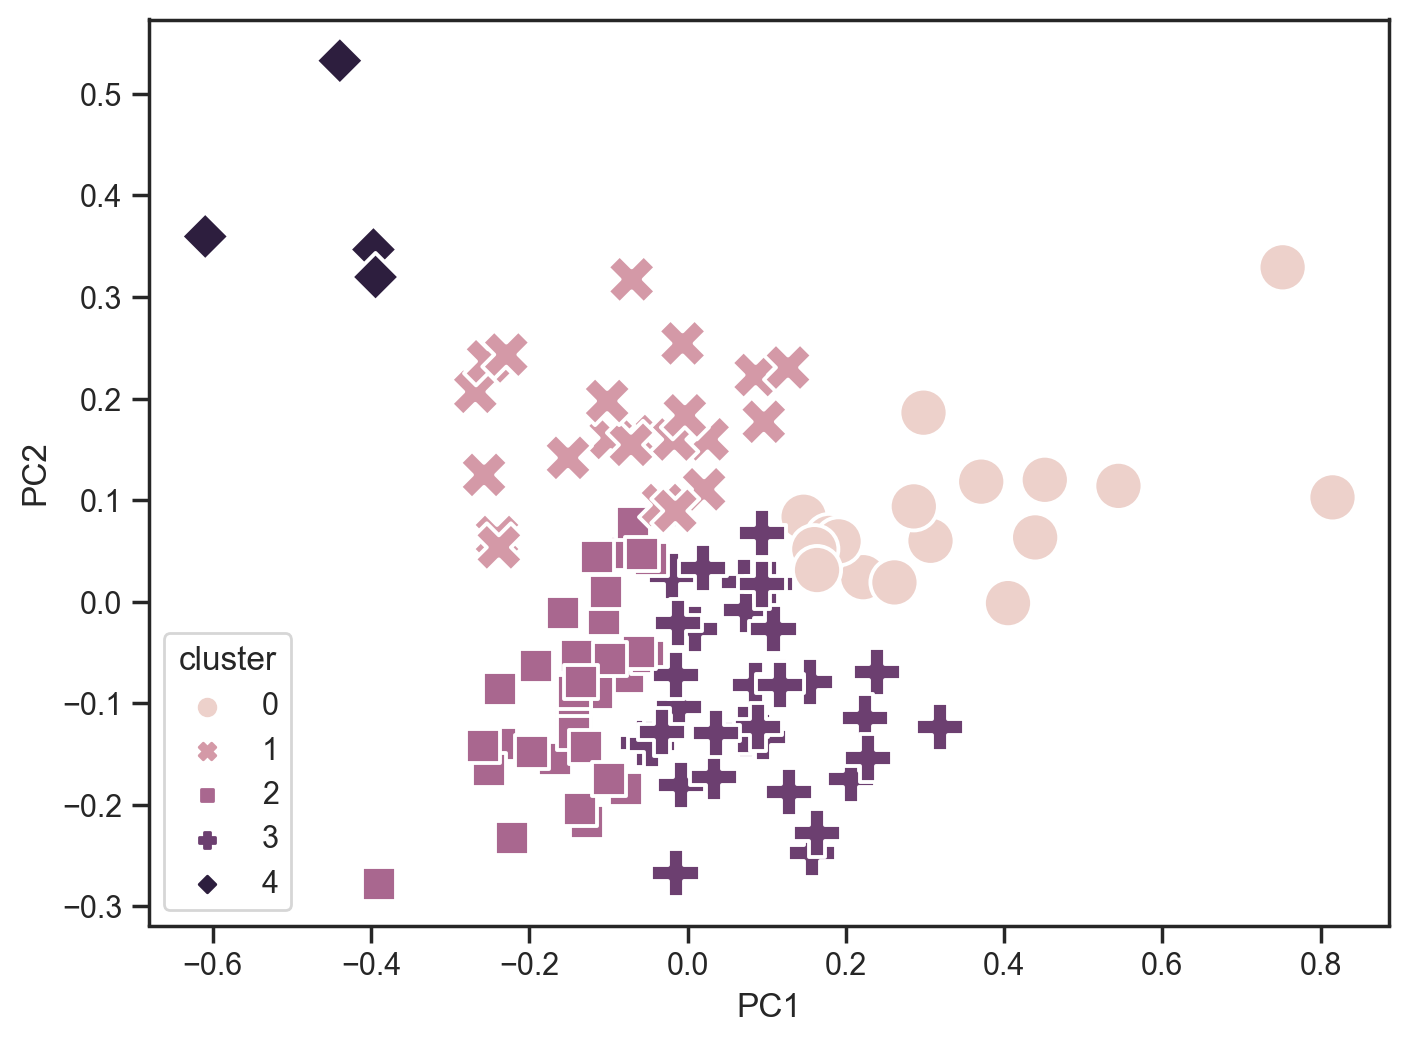

In [2345]:
import seaborn as sns 
plt.figure(figsize=(8,6))
sns.scatterplot(data=deux_composantes, x='PC1', y='PC2', hue='cluster', style='cluster', s=300)
plt.show()

In [2346]:
# Enregistrement de la liste des pays et clusters en CSV
deux_composantes[['pays', 'cluster']].to_csv('groupes_pays.csv')

In [2347]:
# Jointure des données non normalisées avec les clusters et coordonnées de l'ACP
df = pd.merge(df, deux_composantes, how='left', on='pays')
df.sample(3)
df_dumm= pd.get_dummies(df, columns=['cluster'])
df_dumm

,continent,pays,iso_a3,geometry,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export,PC1,PC2,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",89.0,8.62,24.0,25.63,0.877459,1.049354,13429.3,1.270078,-3.0,0.085859,-0.081788,0,0,0,1,0
1,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",154.0,13.83,1431.0,38.97,36.732095,1.115433,48317.1,1.052924,-19.0,-0.135473,-0.058199,0,0,1,0,0
2,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",220.0,19.98,18305.0,55.80,325.084756,1.081423,60109.7,1.075823,3569.0,-0.075841,-0.074486,0,0,1,0,0
3,Asia,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",61.0,6.17,328.0,18.24,18.080019,1.151439,24863.0,1.274993,-168.0,0.071332,0.019830,0,0,0,1,0
4,Asia,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",7.0,0.71,67.0,2.11,31.959785,1.174789,6518.8,1.671016,-8.0,0.451498,0.120025,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Europe,Bosnia and Herzegovina,BIH,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",63.0,6.36,63.0,18.74,3.351525,0.890703,13753.8,1.317187,-2.0,0.163954,-0.227649,0,0,0,1,0
113,Europe,North Macedonia,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",68.0,7.03,41.0,19.78,2.081996,1.008023,15649.9,1.264189,-39.0,0.088549,-0.123284,0,0,0,1,0
114,Europe,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",35.0,3.50,90.0,10.16,8.829628,0.970162,16611.0,1.199671,-5.0,0.033775,-0.172881,0,0,0,1,0
115,Europe,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",55.0,5.78,10.0,15.97,0.627563,1.012925,19682.3,1.211345,-8.0,0.035945,-0.129020,0,0,0,1,0


### Heatmap_1

In [2348]:
df_dumcor=df_dumm.corr()

In [2349]:
df_dumcor=df_dumcor[df_dumcor.index.str.contains("cluster")].T
df_dumcor=df_dumcor[~df_dumcor.index.str.contains("cluster")]
df_dumcor

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
dispo_calories,-0.087918,-0.336105,0.352233,-0.039002,0.084552
dispo_proteines,-0.121978,-0.336657,0.385831,-0.055918,0.108173
dispo_int,0.028805,-0.121729,0.209507,-0.112301,-0.048795
dispo_kg,-0.105677,-0.334911,0.353708,-0.042021,0.120292
population,0.280455,-0.025867,-0.037272,-0.133217,-0.053861
population_croissance,0.042090,0.564789,-0.271653,-0.460300,0.573118
pib,-0.244362,-0.273174,0.405731,-0.052737,0.149641
pib_croissance,0.690628,-0.099346,-0.512987,0.205413,-0.325444
poulet_import-export,-0.031223,-0.104449,0.153707,-0.014858,-0.073234
PC1,0.667290,-0.177171,-0.450252,0.253782,-0.397365


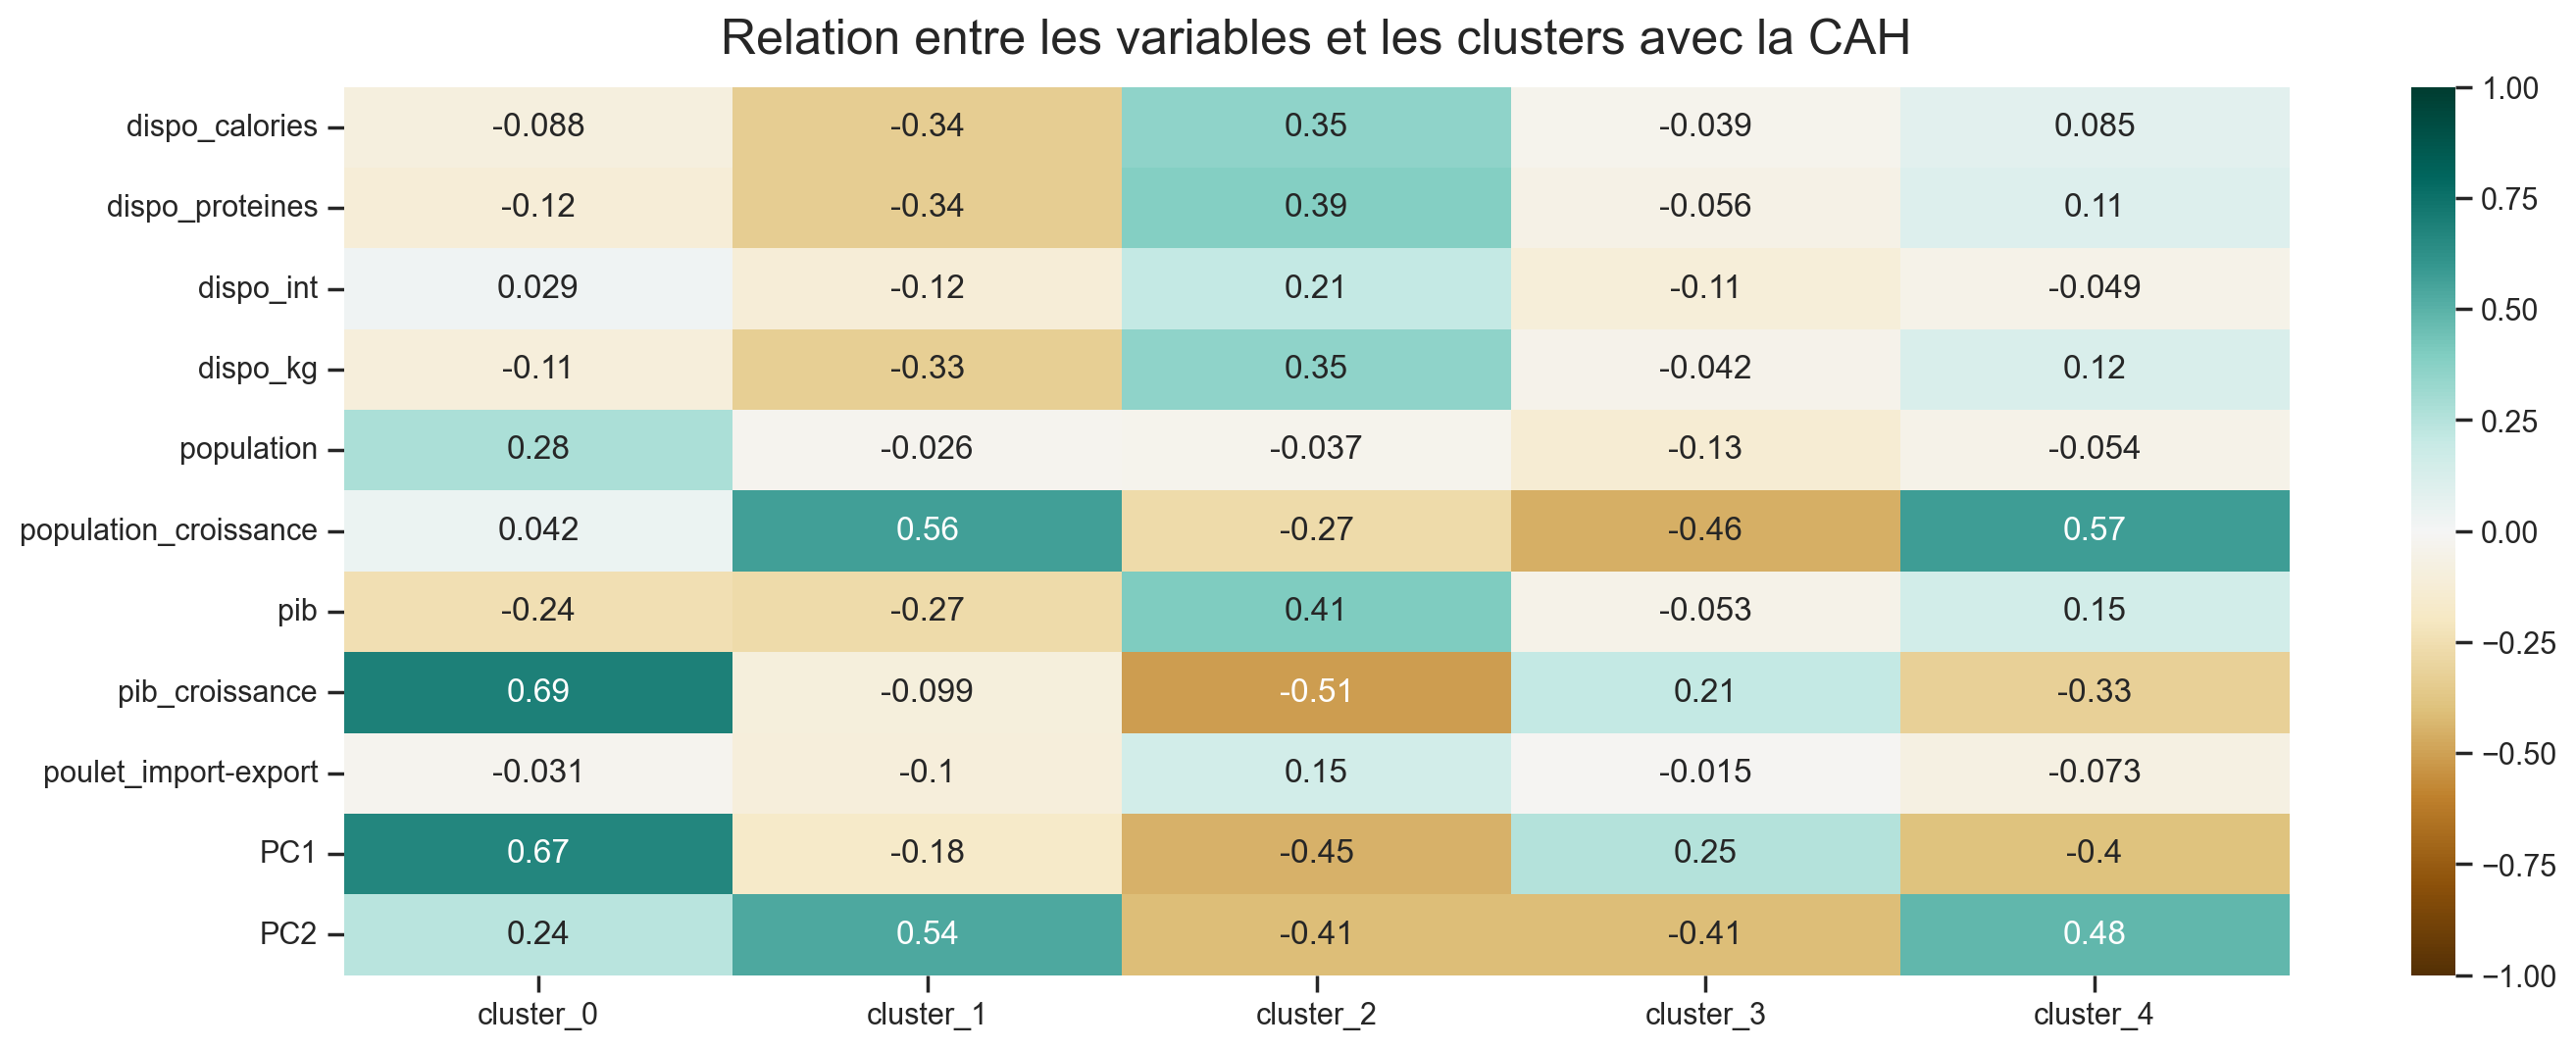

In [2350]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_dumcor, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Relation entre les variables et les clusters avec la CAH', fontdict={'fontsize':18}, pad=12);


## Centroïdes


In [2351]:
# Moyenne par cluster de chaque composante issue de l'ACP (centroïdes)
centroides = deux_composantes.groupby(['cluster']).mean().reset_index()

centroides['cluster'] = 'centroïde'


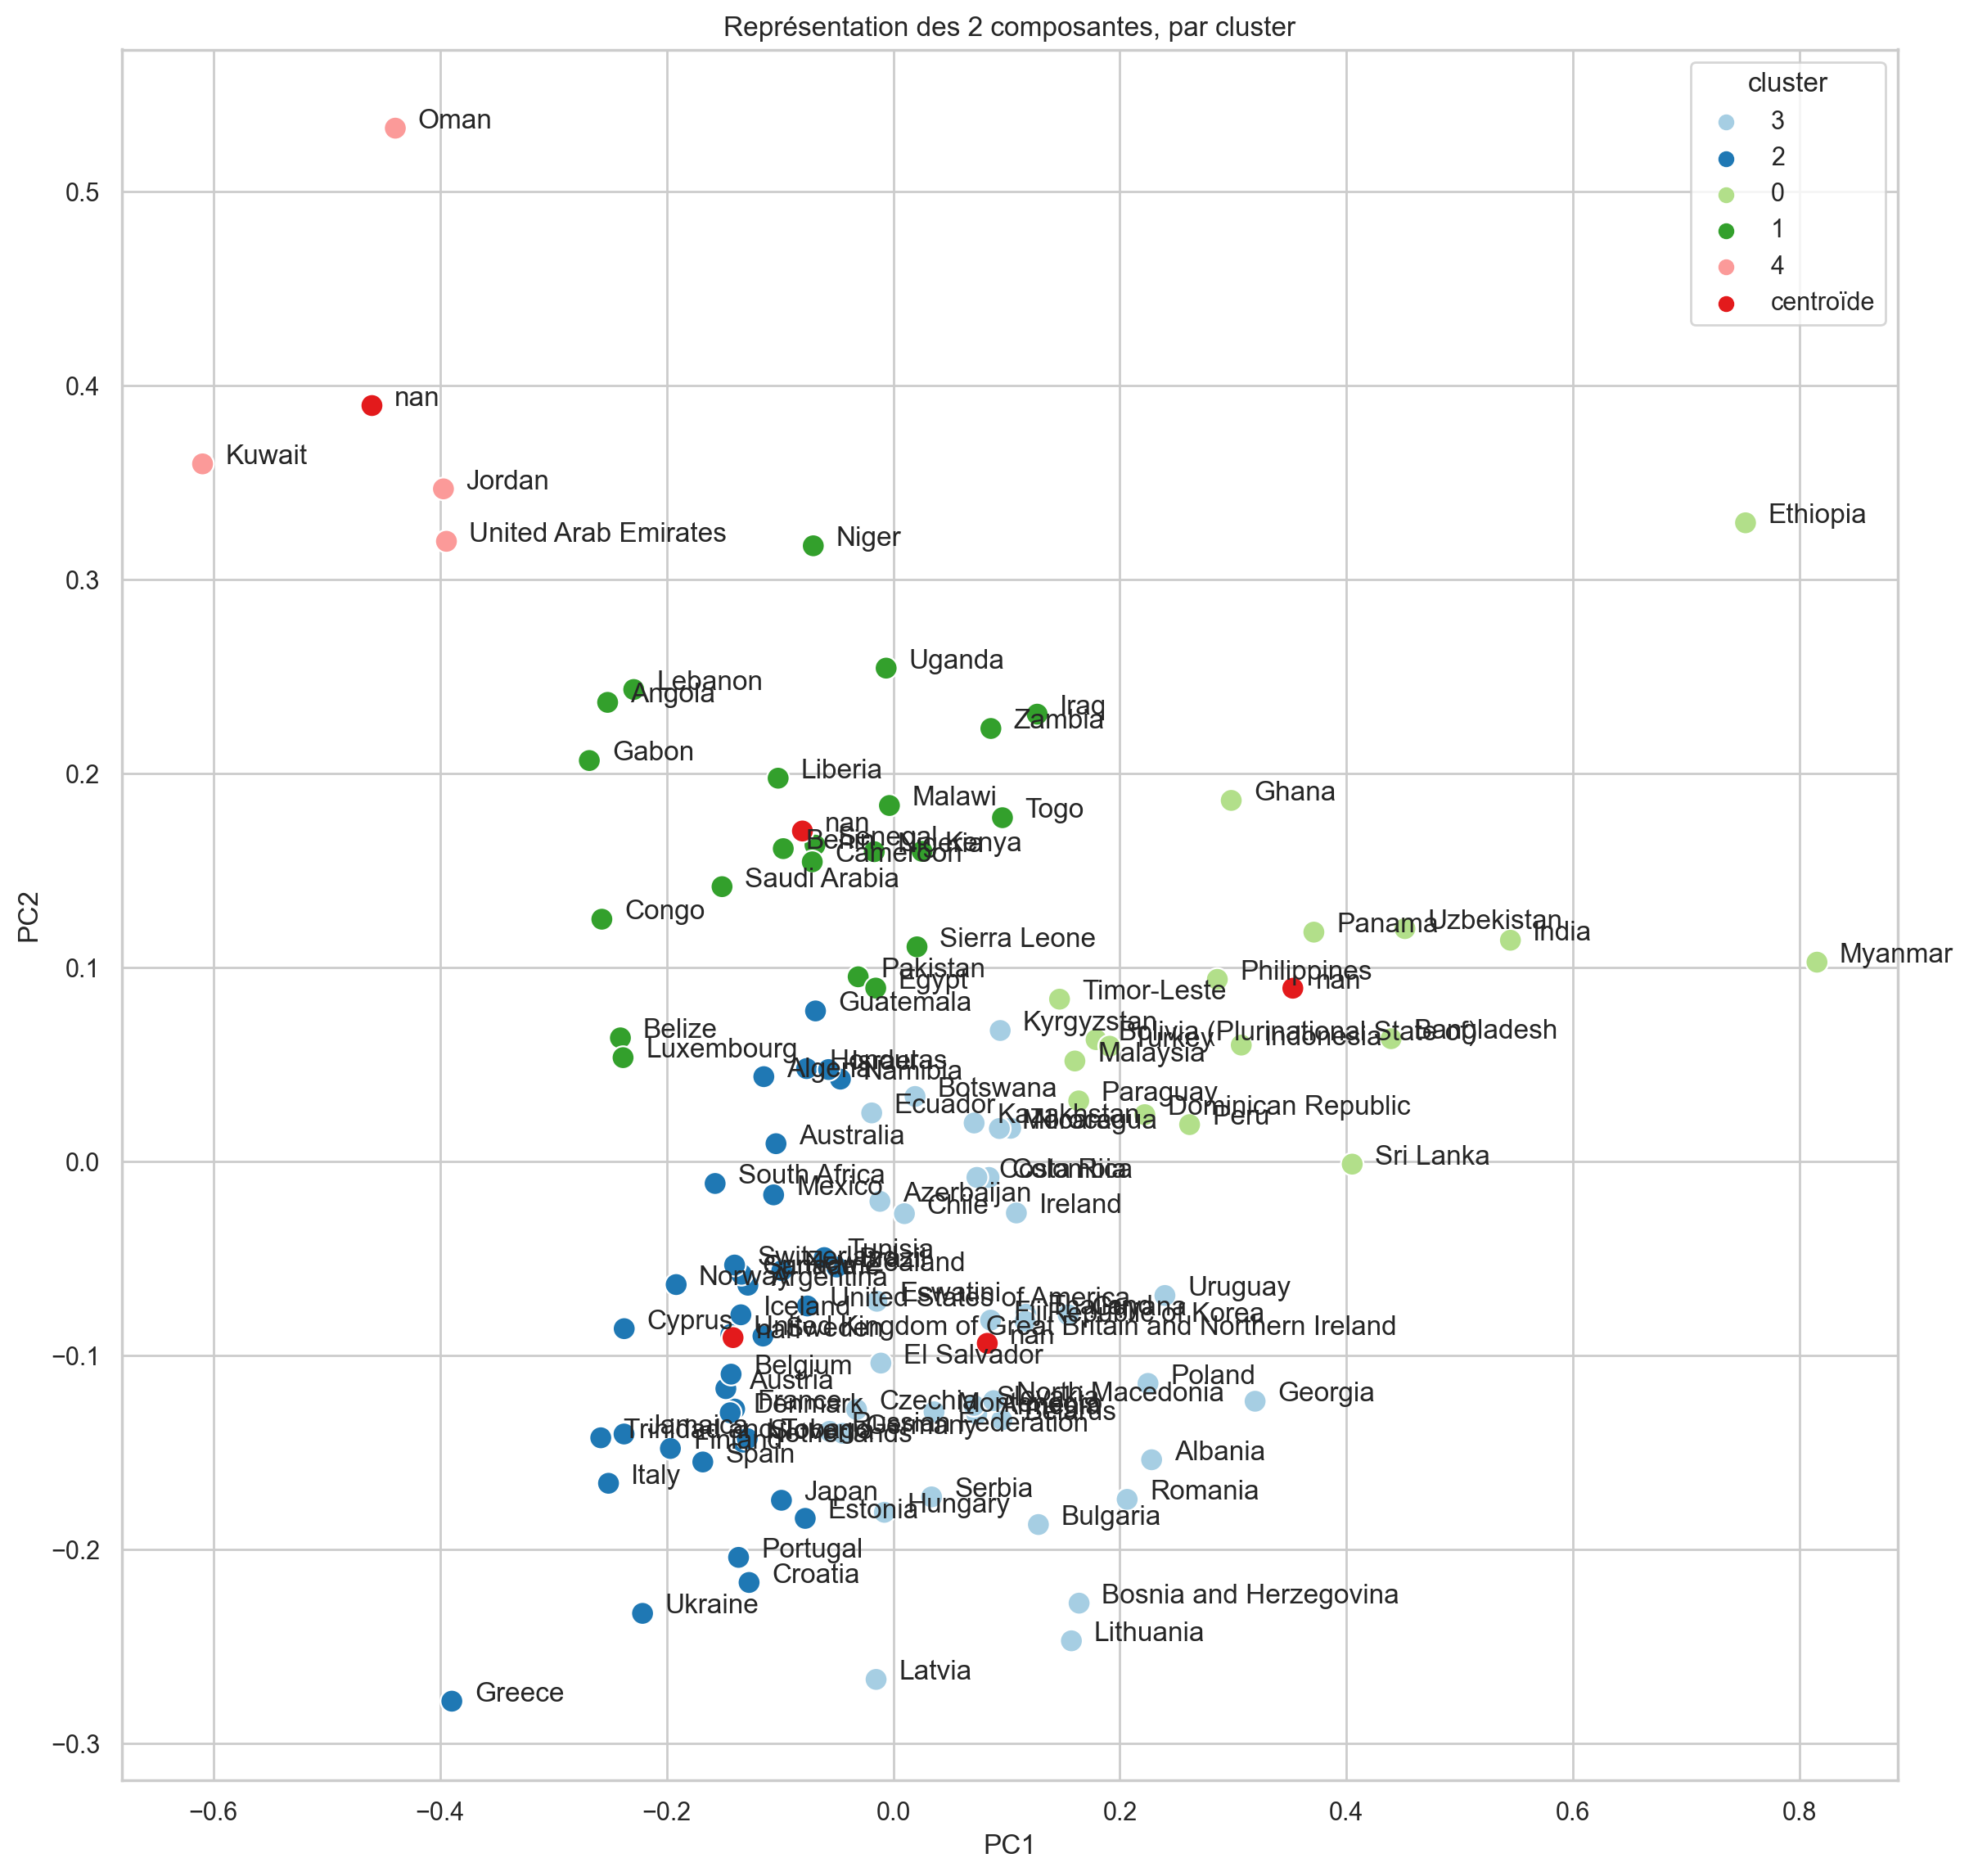

In [2352]:
sns.set( # Styles Seaborn
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,5)})
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]
plt.figure(figsize=(14,14))
# Jointure des centroïdes sur la dataframe des 2 composantes
deux_composantes_centroides = pd.concat([deux_composantes, centroides])

# Scatterplot des 2 composantes
ax = sns.scatterplot(data=deux_composantes_centroides, x='PC1', y='PC2', hue='cluster', s=100)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(deux_composantes_centroides['PC1'], deux_composantes_centroides['PC2'],deux_composantes_centroides['pays'], plt.gca())
plt.title('Représentation des 2 composantes, par cluster')
plt.show()




In [2353]:
# Nombre et exemples de pays dans chaque cluster
for i in df.sort_values('cluster')['cluster'].unique():
    print('Cluster', i, ':', len(df[df['cluster']==i]), 'pays\n' + 
        ', '.join(df[df['cluster']==i]['pays'].values), '\n' + '- '*3)

Cluster 0 : 17 pays
Uzbekistan, Indonesia, Dominican Republic, Timor-Leste, Bolivia (Plurinational State of), Peru, Panama, Ghana, Myanmar, India, Bangladesh, Turkey, Sri Lanka, Philippines, Malaysia, Paraguay, Ethiopia 
- - - 
Cluster 1 : 22 pays
Kenya, Belize, Senegal, Benin, Niger, Nigeria, Cameroon, Togo, Liberia, Sierra Leone, Congo, Gabon, Zambia, Malawi, Angola, Lebanon, Iraq, Pakistan, Luxembourg, Saudi Arabia, Egypt, Uganda 
- - - 
Cluster 2 : 38 pays
Canada, United States of America, Argentina, Norway, South Africa, Mexico, Brazil, Honduras, Guatemala, Suriname, France, Jamaica, Namibia, Israel, Tunisia, Algeria, Sweden, Ukraine, Austria, Estonia, Greece, Croatia, Switzerland, Belgium, Netherlands, Portugal, Spain, New Zealand, Australia, Italy, Denmark, United Kingdom of Great Britain and Northern Ireland, Iceland, Slovenia, Finland, Japan, Cyprus, Trinidad and Tobago 
- - - 
Cluster 3 : 36 pays
Fiji, Kazakhstan, Chile, Russian Federation, Uruguay, Colombia, Costa Rica, Nica

# Choix du cluster

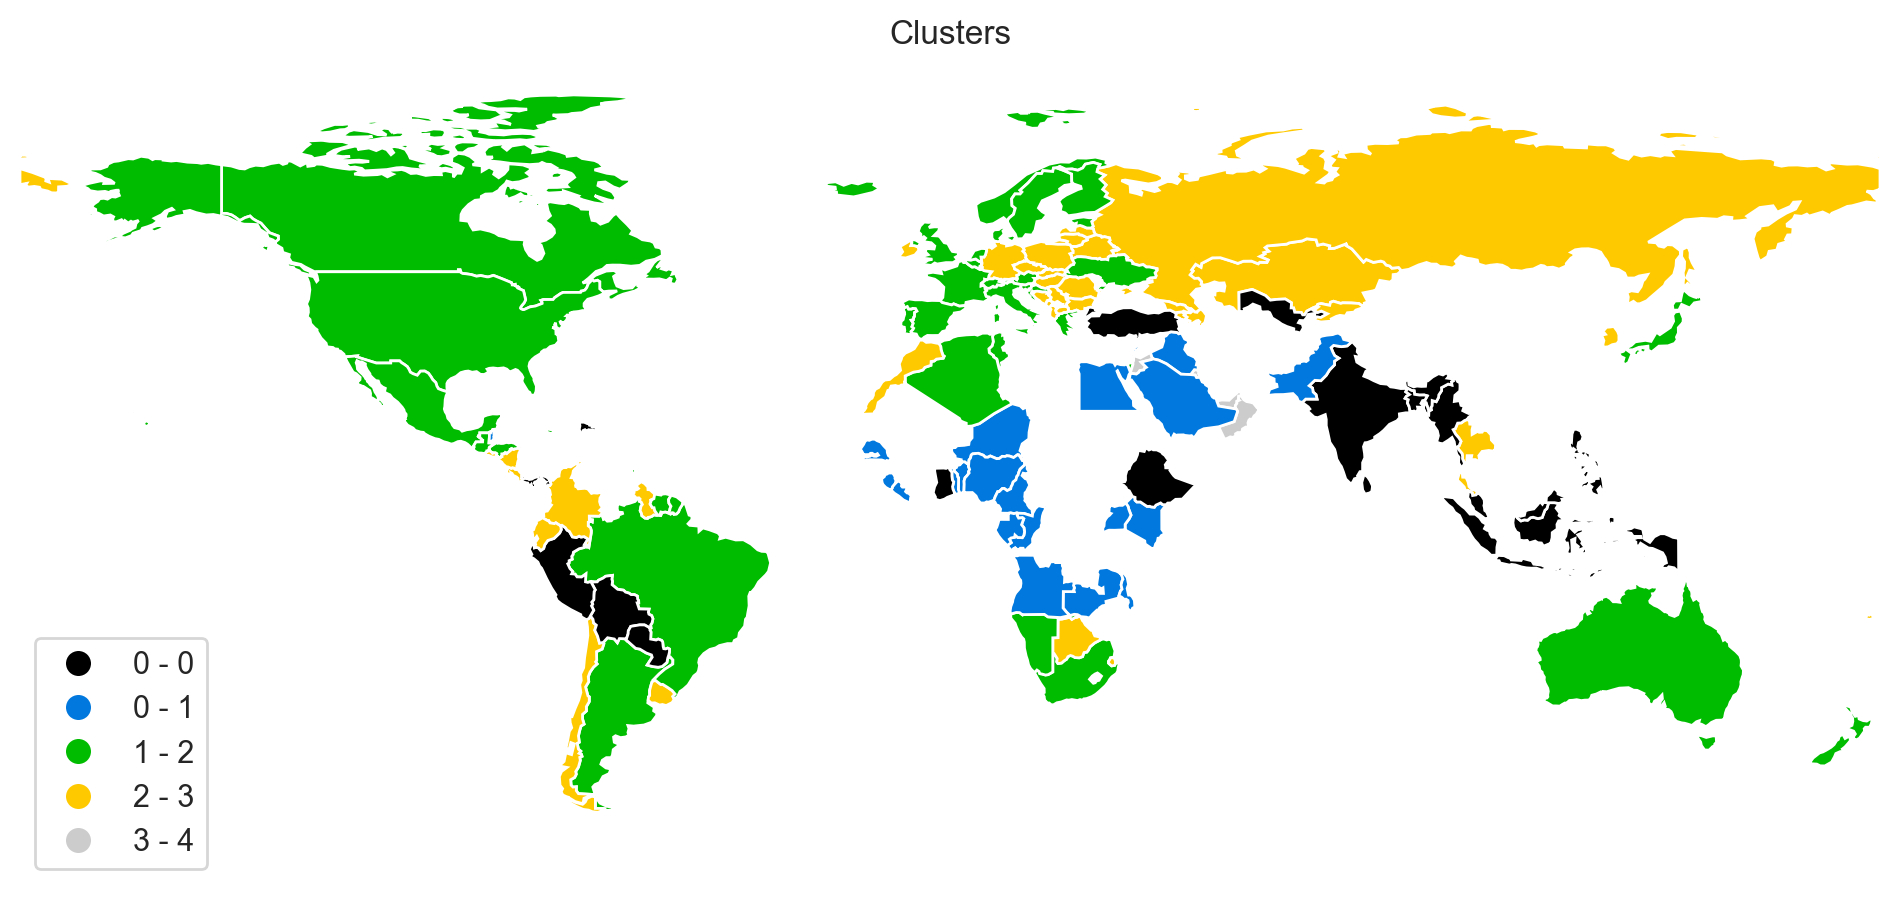

In [2354]:
import geoplot
geoplot.choropleth(
    df, hue='cluster', edgecolor='white', linewidth=1,
    cmap='nipy_spectral', legend=True, scheme='FisherJenks', figsize=(12, 15))
plt.title('Clusters')
plt.show()

### 5 groupes, par import export 

cluster 2 supprimé : 
- les pays du cluster 2 representent une balance excedentaire 
- c'est à dire ils font plud d'exportions que d'importations


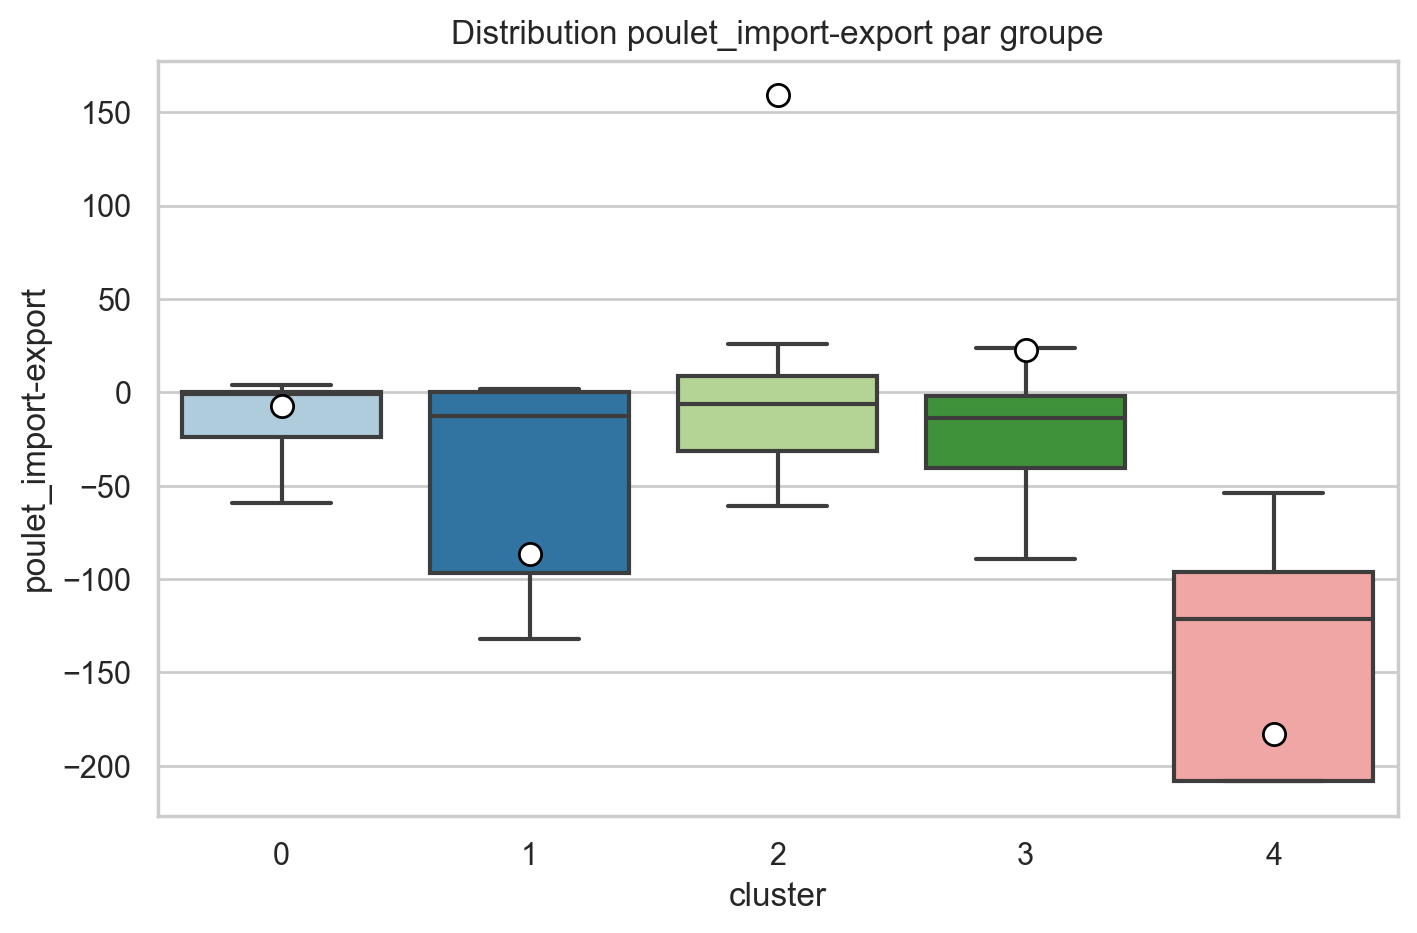

In [2355]:

plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=df, y='poulet_import-export', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Distribution poulet_import-export par groupe')
plt.show()

In [2356]:
print('Cluster à mettre de côté :', df[df['cluster']==2]['pays'].unique())
quatre_groupes = df.drop(df[df['cluster']==2].index)

Cluster à mettre de côté : ['Canada' 'United States of America' 'Argentina' 'Norway' 'South Africa'
 'Mexico' 'Brazil' 'Honduras' 'Guatemala' 'Suriname' 'France' 'Jamaica'
 'Namibia' 'Israel' 'Tunisia' 'Algeria' 'Sweden' 'Ukraine' 'Austria'
 'Estonia' 'Greece' 'Croatia' 'Switzerland' 'Belgium' 'Netherlands'
 'Portugal' 'Spain' 'New Zealand' 'Australia' 'Italy' 'Denmark'
 'United Kingdom of Great Britain and Northern Ireland' 'Iceland'
 'Slovenia' 'Finland' 'Japan' 'Cyprus' 'Trinidad and Tobago']


## 4 groupes, par indicateurs de PIB

cluster 4 supprimé :
- les pays appartenant à ce groupe ont une croissance PIB faible 


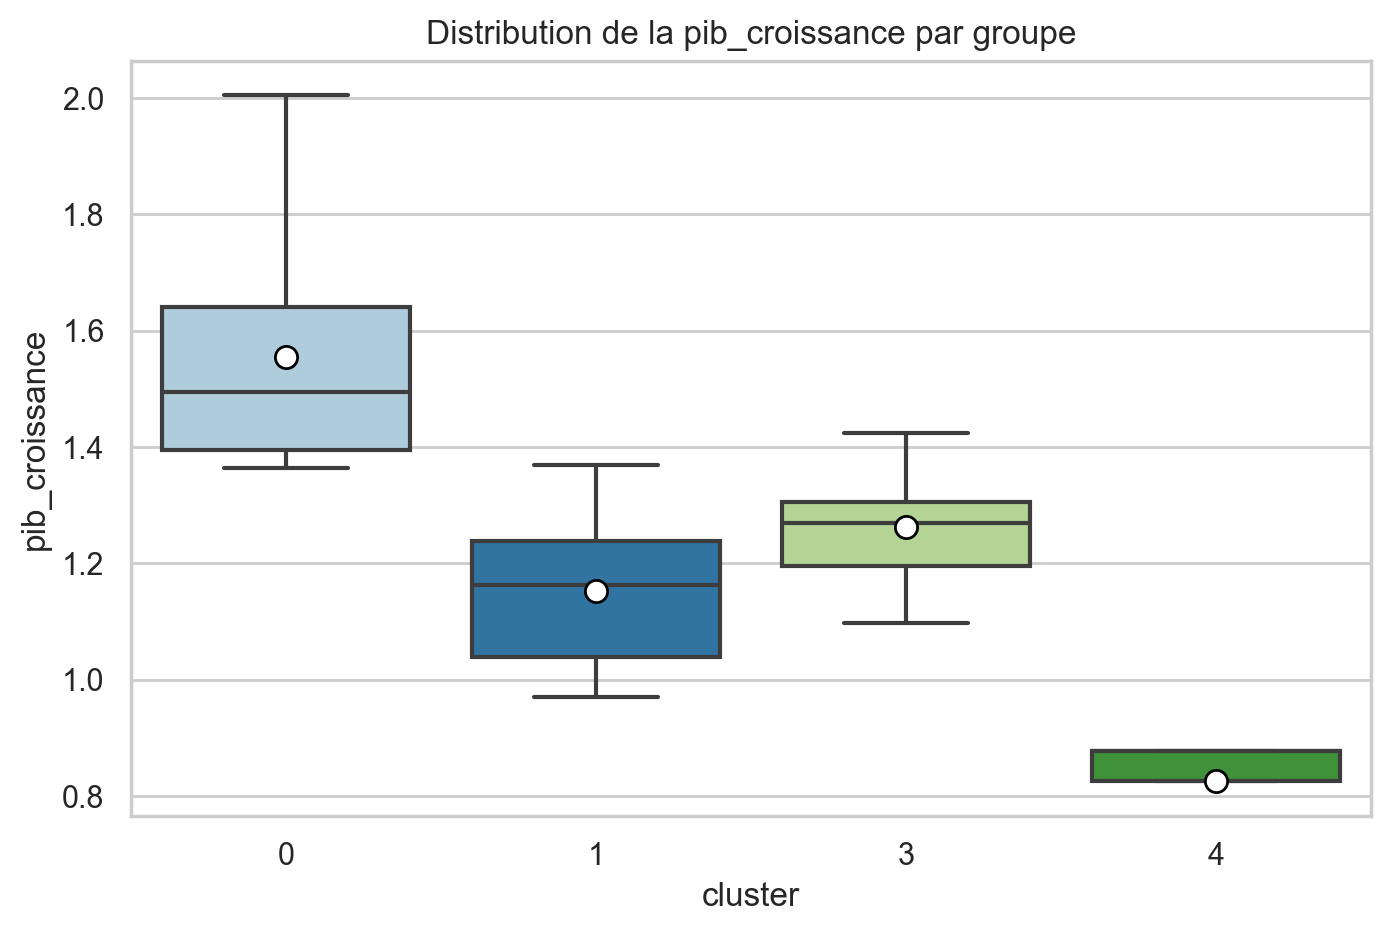

In [2357]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=quatre_groupes, y='pib_croissance', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Distribution de la pib_croissance par groupe')
plt.show()

In [2358]:
print('Cluster à mettre de côté :', quatre_groupes[quatre_groupes['cluster']==4]['pays'].unique())
trois_groupes = quatre_groupes.drop(quatre_groupes[quatre_groupes['cluster']==4].index)

Cluster à mettre de côté : ['Jordan' 'United Arab Emirates' 'Kuwait' 'Oman']


## 3 groupes, par indicateurs démographiques

cluster 3 supprimé :
- les pays qui appartiennent au cluster 3 ont une croissance démographique faible

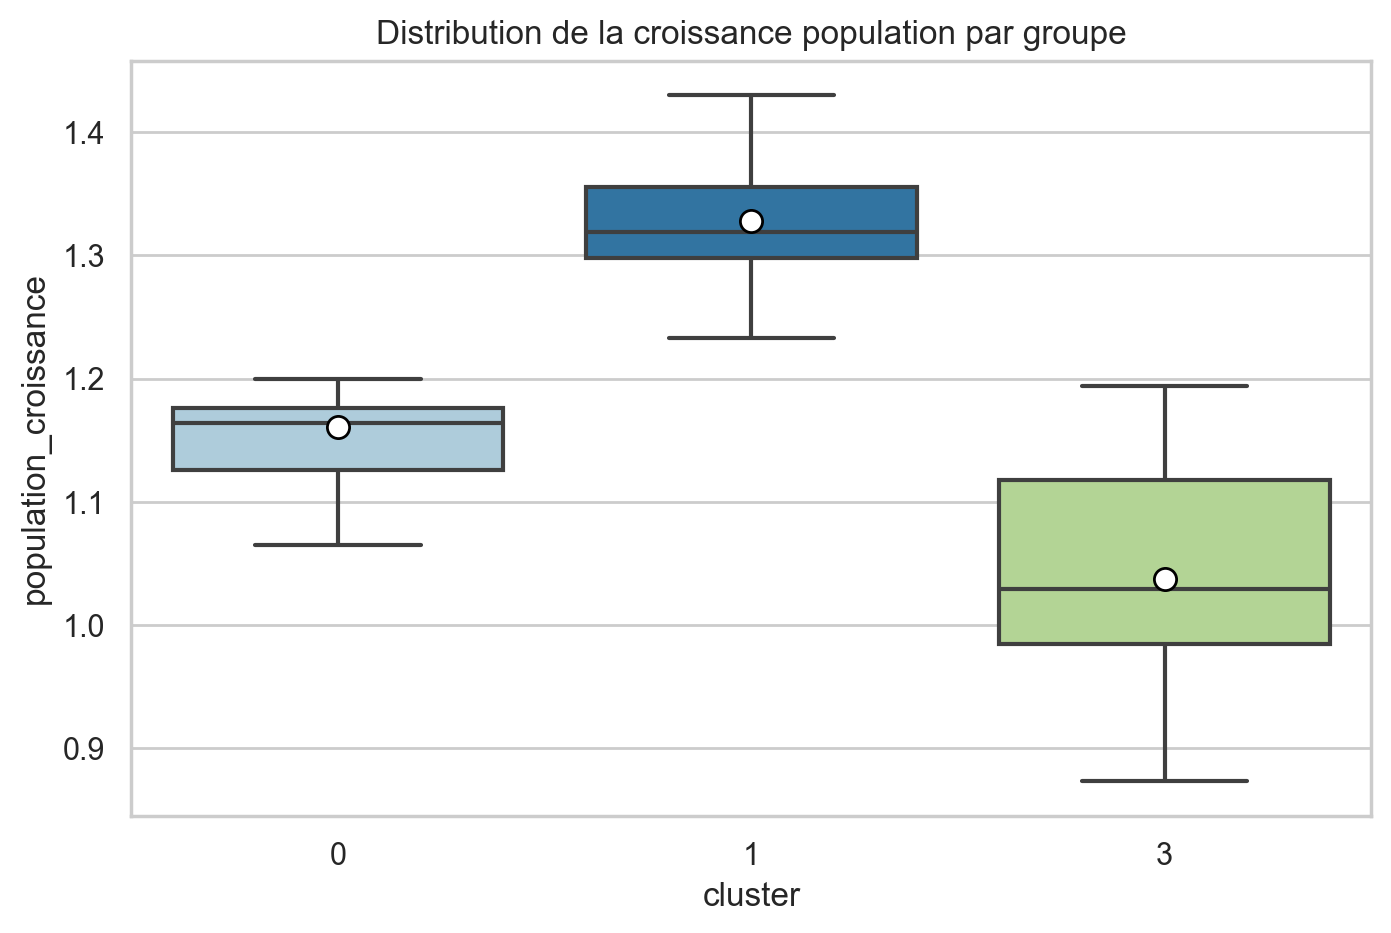

In [2359]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=trois_groupes, y='population_croissance', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Distribution de la croissance population par groupe')
plt.show()

In [2360]:
print('Cluster à mettre de côté :', trois_groupes[trois_groupes['cluster']==3]['pays'].unique())
groupe = trois_groupes.drop(trois_groupes[trois_groupes['cluster']==3].index)

Cluster à mettre de côté : ['Fiji' 'Kazakhstan' 'Chile' 'Russian Federation' 'Uruguay' 'Colombia'
 'Costa Rica' 'Nicaragua' 'El Salvador' 'Guyana' 'Ecuador' 'Botswana'
 'Eswatini' 'Thailand' 'Republic of Korea' 'Kyrgyzstan' 'Armenia'
 'Belarus' 'Poland' 'Hungary' 'Romania' 'Lithuania' 'Latvia' 'Germany'
 'Bulgaria' 'Albania' 'Ireland' 'Azerbaijan' 'Georgia' 'Slovakia'
 'Czechia' 'Morocco' 'Bosnia and Herzegovina' 'North Macedonia' 'Serbia'
 'Montenegro']


In [2361]:
# Liste des pays (39 pays)
groupe

,continent,pays,iso_a3,geometry,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export,PC1,PC2,cluster
4,Asia,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",7.0,0.71,67.0,2.11,31.959785,1.174789,6518.8,1.671016,-8.0,0.451498,0.120025,0
5,Asia,Indonesia,IDN,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",27.0,2.59,2049.0,7.74,264.650963,1.138900,10935.6,1.494057,-1.0,0.307066,0.059992,0
8,Africa,Kenya,KEN,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",7.0,0.72,107.0,2.12,50.221142,1.297505,4046.2,1.256077,0.0,0.025360,0.159854,1
9,North America,Dominican Republic,DOM,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",123.0,10.86,374.0,35.17,10.513104,1.125737,16735.4,1.423502,-36.0,0.221950,0.024148,0
12,Asia,Timor-Leste,TLS,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656...",14.0,1.44,5.0,4.22,1.243258,1.199602,3145.5,1.363814,-12.0,0.146691,0.083657,0
17,South America,Bolivia (Plurinational State of),BOL,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...",195.0,14.38,507.0,45.28,11.192855,1.170992,8423.7,1.384248,0.0,0.178961,0.062792,0
18,South America,Peru,PER,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...",177.0,18.96,1523.0,38.05,31.444298,1.109810,12506.5,1.449306,-59.0,0.261472,0.019008,0
20,North America,Panama,PAN,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",117.0,10.29,192.0,33.72,4.106769,1.189101,30446.8,1.591940,-19.0,0.371142,0.118205,0
26,North America,Belize,BLZ,"POLYGON ((-89.14308 17.80832, -89.15091 17.955...",110.0,8.26,19.0,25.68,0.375769,1.256647,7193.6,0.976940,0.0,-0.240832,0.063714,1
34,Africa,Senegal,SEN,"POLYGON ((-16.71373 13.59496, -17.12611 14.373...",21.0,2.09,96.0,6.20,15.419355,1.319351,3203.9,1.163278,0.0,-0.069105,0.163064,1


## Clustering par la méthode Kmeans

- Le partitionnement en K-means, est une méthode de partitionnement de données faisant appel à un algorithme non  supervisé de clustering non hiérarchique.

### choix cluster : 

- Pour trouver le nombre optimal de clusters on met dans un graphique les inerties en fonction des clusters . 
  Le nombre optimal correspond aux points où la décroissance de l'inertie commence à ralentir, c'est à dire entre 5 et 8 




Text(0, 0.5, 'Inertia')

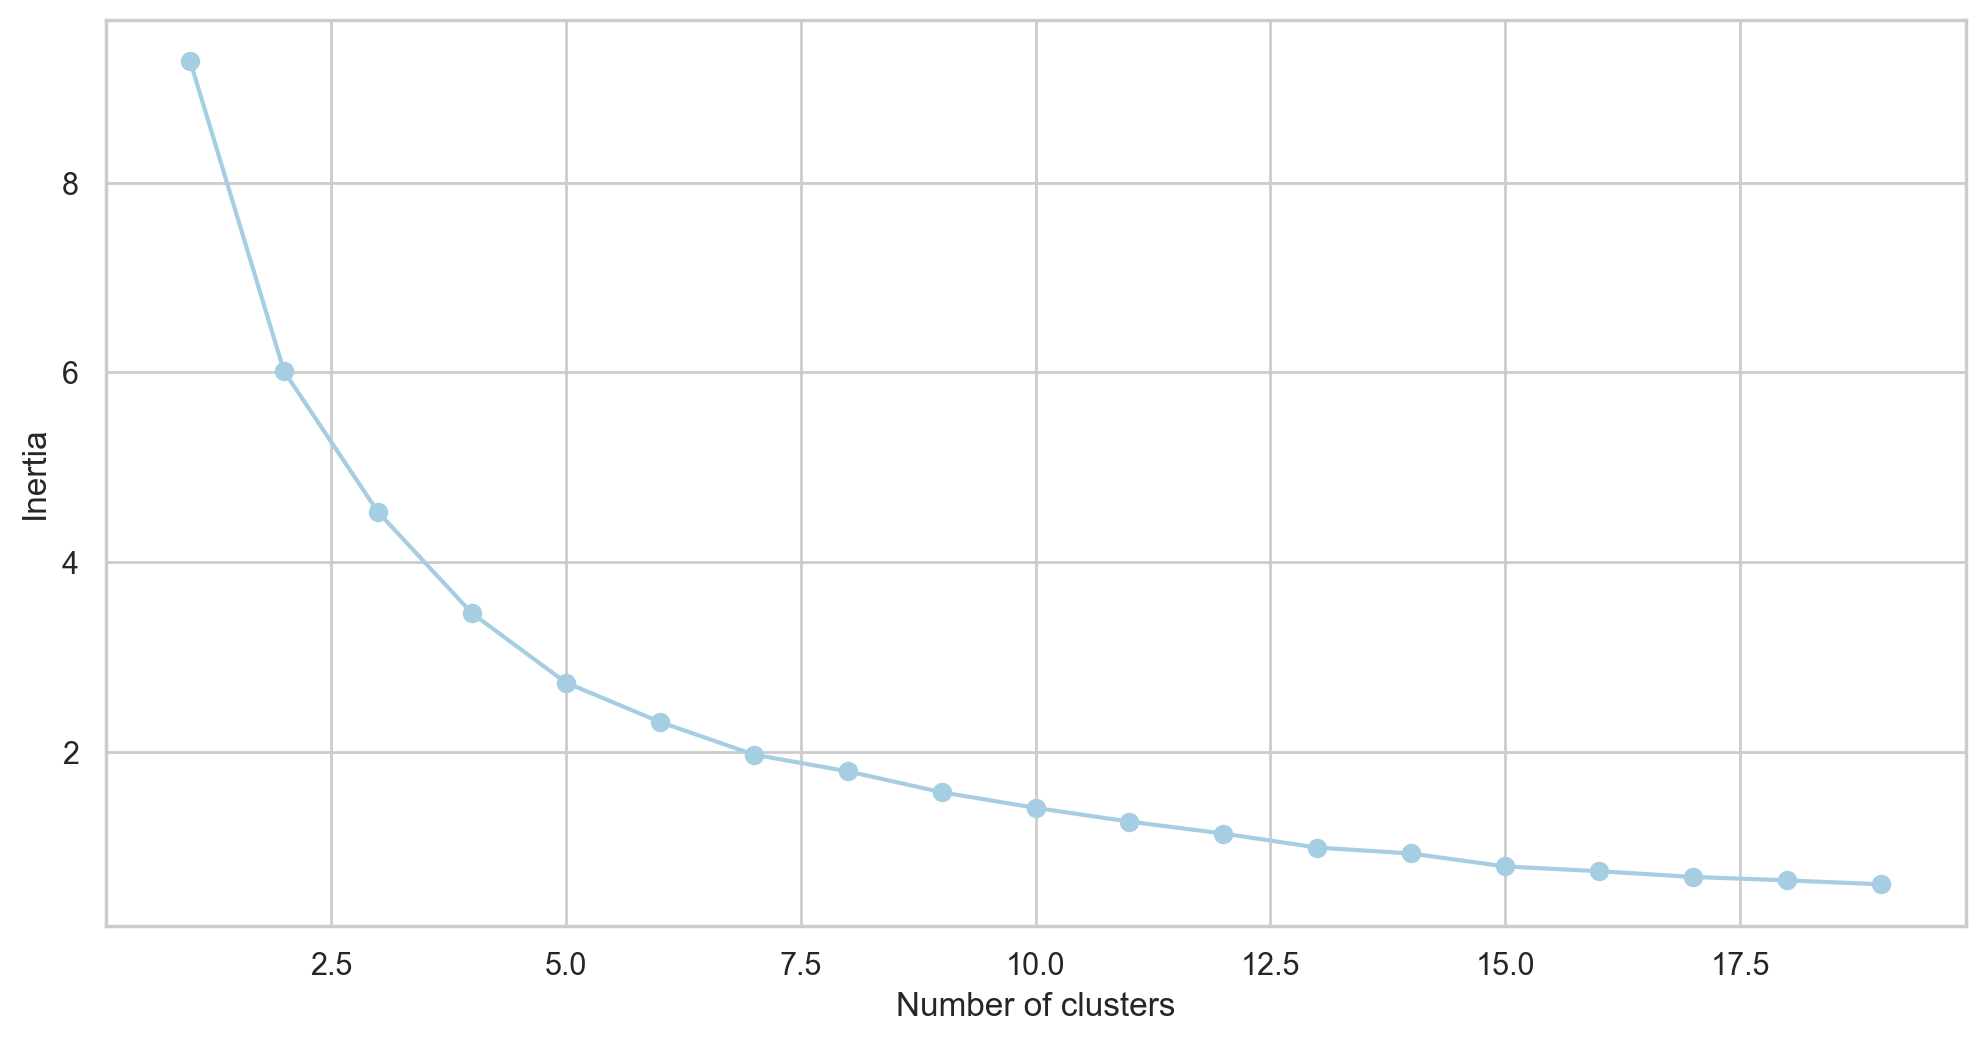

In [2362]:
from sklearn.cluster import KMeans
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(df_std.drop(categorial , axis=1))
    SSE.append(kmeans.inertia_)

# convertir les resultas en une df de données et visualiser
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [2363]:
km=KMeans(n_clusters=5, random_state=0).fit(df_std.drop(categorial , axis=1))
clusters = pd.DataFrame(km.predict(df_std.drop(categorial , axis=1)), columns=['cluster'])
clusters
deux_composantes = pd.merge(results['PC'], clusters, left_index=True, right_index=True)
deux_composantes = pd.merge(deux_composantes, df['pays'], left_index=True, right_index=True)
deux_composantes

,PC1,PC2,cluster,pays
0,0.085859,-0.081788,0,Fiji
1,-0.135473,-0.058199,3,Canada
2,-0.075841,-0.074486,3,United States of America
3,0.071332,0.019830,0,Kazakhstan
4,0.451498,0.120025,2,Uzbekistan
...,...,...,...,...
112,0.163954,-0.227649,0,Bosnia and Herzegovina
113,0.088549,-0.123284,0,North Macedonia
114,0.033775,-0.172881,0,Serbia
115,0.035945,-0.129020,0,Montenegro


### Nuange des individus 

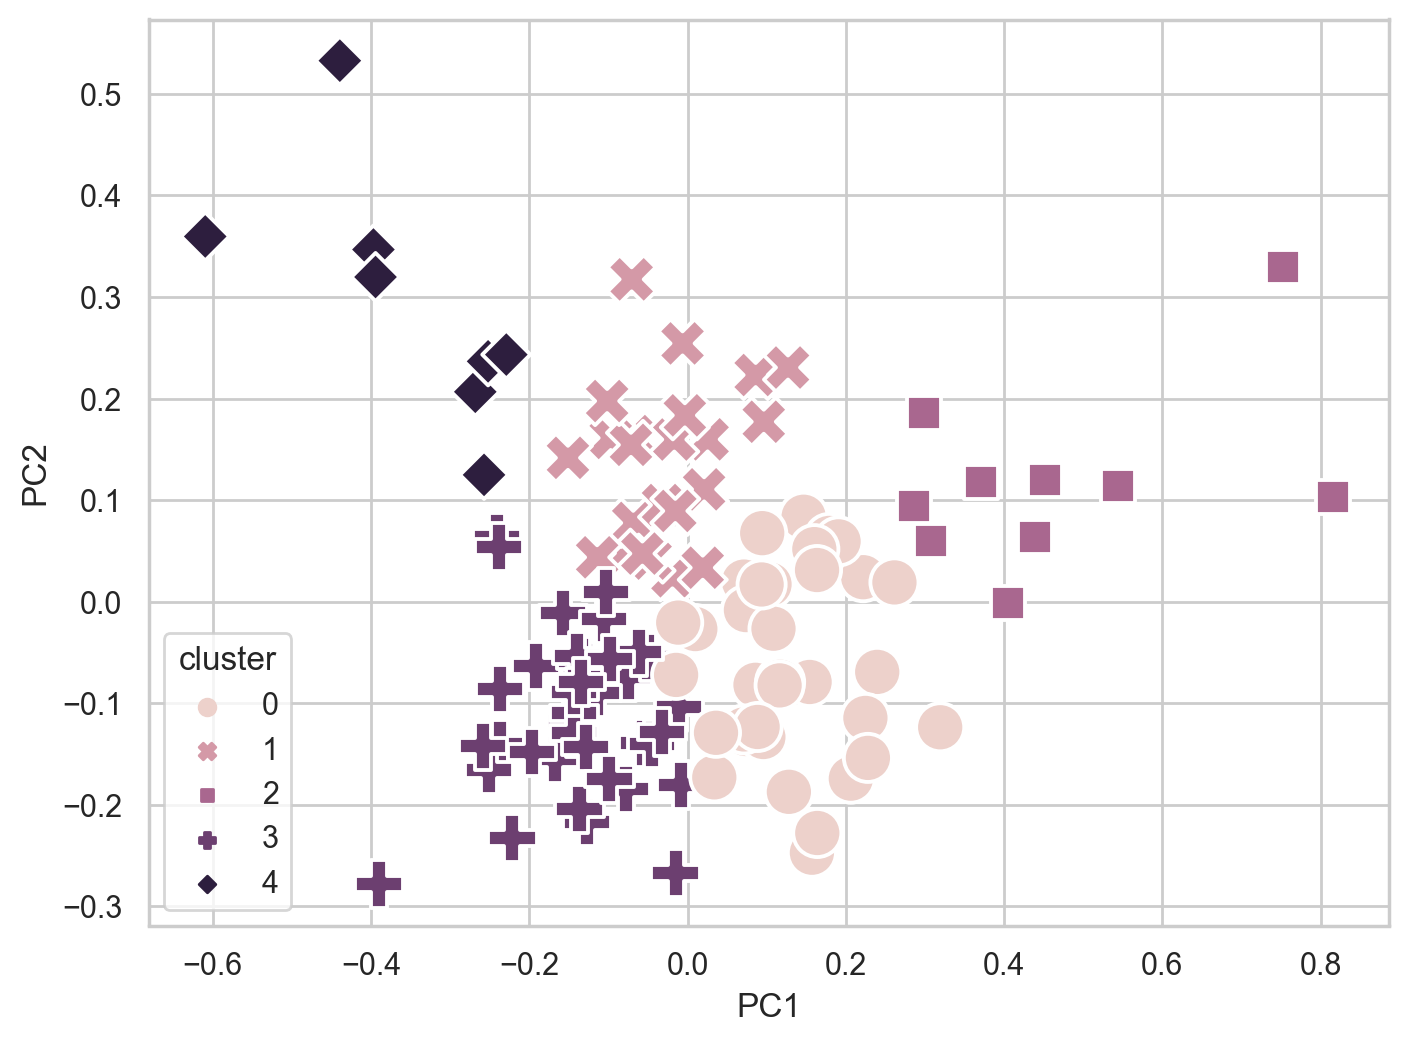

In [2364]:
import seaborn as sns 
plt.figure(figsize=(8,6))
sns.scatterplot(data=deux_composantes, x='PC1', y='PC2', hue='cluster', style='cluster', s=300)
plt.show()

In [2365]:
# Jointure des données non normalisées avec les clusters et coordonnées de l'ACP
df = pd.merge(df.drop(["PC1","PC2","cluster"],axis=1), deux_composantes, how='left', on='pays')

In [2366]:
df_dumm= pd.get_dummies(df, columns=['cluster'])
df_dumcor=df_dumm.corr()
df_dumcor=df_dumcor[df_dumcor.index.str.contains("cluster")].T
df_dumcor=df_dumcor[~df_dumcor.index.str.contains("cluster")]
df_dumcor

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
dispo_calories,0.039742,-0.318254,-0.232856,0.346086,0.032744
dispo_proteines,0.015159,-0.314623,-0.252426,0.362944,0.061436
dispo_int,-0.119871,-0.115636,0.032700,0.233109,-0.077330
dispo_kg,0.024629,-0.319071,-0.232520,0.340675,0.071304
population,-0.142428,-0.024161,0.385935,-0.030459,-0.073498
population_croissance,-0.354717,0.441947,0.040383,-0.384303,0.629367
pib,-0.129871,-0.357318,-0.221428,0.541288,0.020303
pib_croissance,0.356079,0.000952,0.674270,-0.545444,-0.363328
poulet_import-export,0.005564,-0.091605,-0.042160,0.142978,-0.089427
PC1,0.383563,-0.063341,0.655333,-0.465247,-0.442575


### Heatmap_2

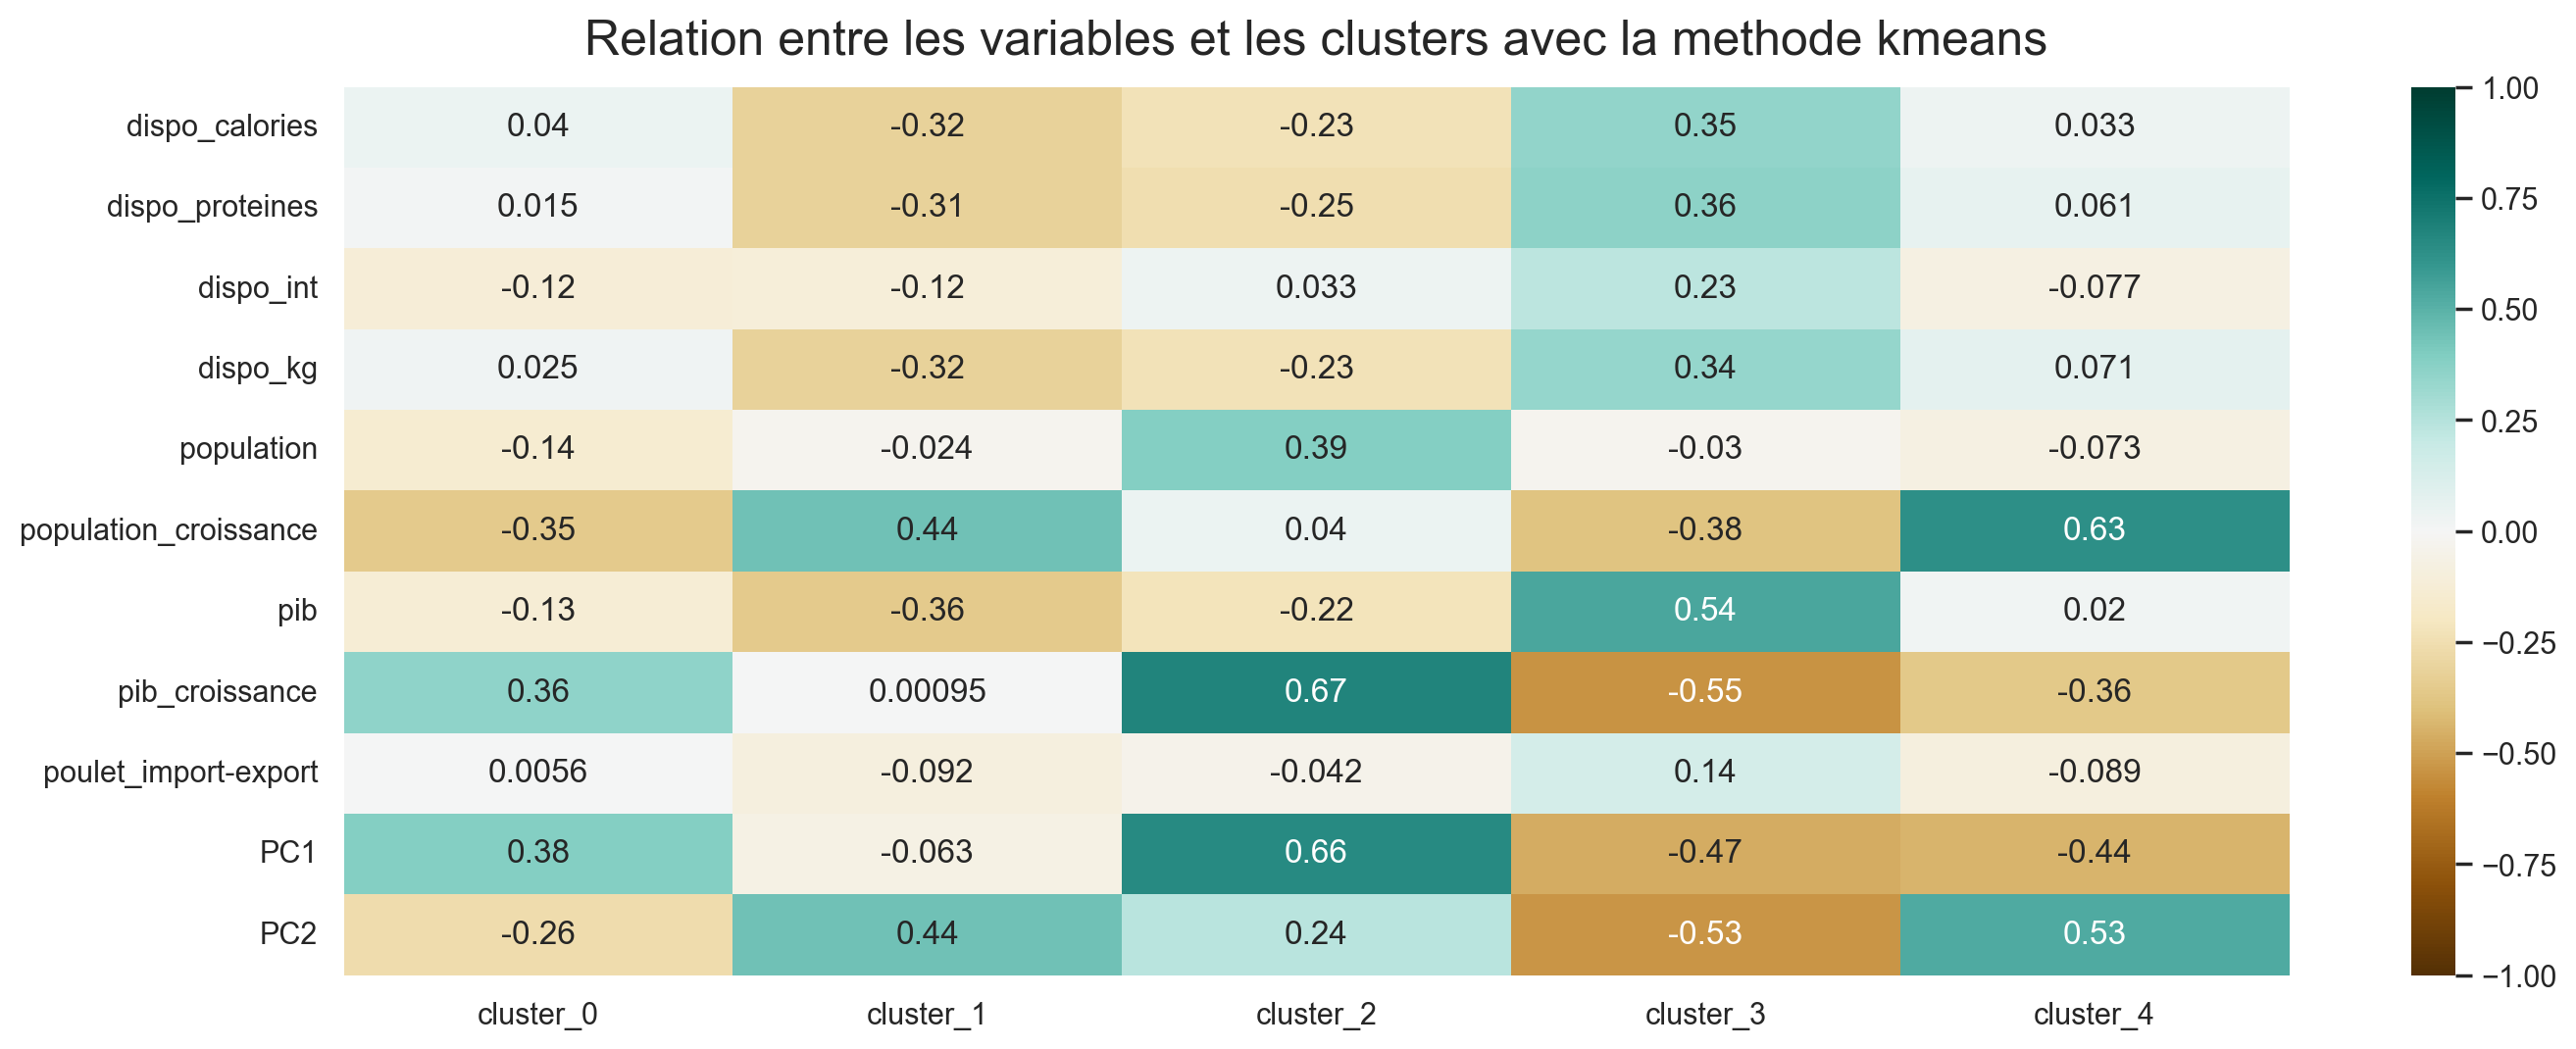

In [2367]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_dumcor, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Relation entre les variables et les clusters avec la methode kmeans', fontdict={'fontsize':18}, pad=12);


In [2368]:
# Nombre et exemples de pays dans chaque cluster
for i in df.sort_values('cluster')['cluster'].unique():
    print('Cluster', i, ':', len(df[df['cluster']==i]), 'pays\n' + 
        ', '.join(df[df['cluster']==i]['pays'].values), '\n' + '- '*3)

Cluster 0 : 35 pays
Fiji, Kazakhstan, Chile, Dominican Republic, Timor-Leste, Uruguay, Bolivia (Plurinational State of), Peru, Colombia, Costa Rica, Nicaragua, Guyana, Eswatini, Thailand, Republic of Korea, Kyrgyzstan, Armenia, Belarus, Poland, Romania, Lithuania, Bulgaria, Turkey, Albania, Ireland, Azerbaijan, Georgia, Malaysia, Slovakia, Paraguay, Morocco, Bosnia and Herzegovina, North Macedonia, Serbia, Montenegro 
- - - 
Cluster 1 : 23 pays
Kenya, Honduras, Guatemala, Ecuador, Botswana, Namibia, Senegal, Benin, Niger, Nigeria, Cameroon, Togo, Liberia, Sierra Leone, Zambia, Malawi, Israel, Algeria, Iraq, Pakistan, Saudi Arabia, Egypt, Uganda 
- - - 
Cluster 2 : 10 pays
Uzbekistan, Indonesia, Panama, Ghana, Myanmar, India, Bangladesh, Sri Lanka, Philippines, Ethiopia 
- - - 
Cluster 3 : 41 pays
Canada, United States of America, Argentina, Russian Federation, Norway, South Africa, Mexico, Brazil, El Salvador, Belize, Suriname, France, Jamaica, Tunisia, Sweden, Ukraine, Austria, Hungar

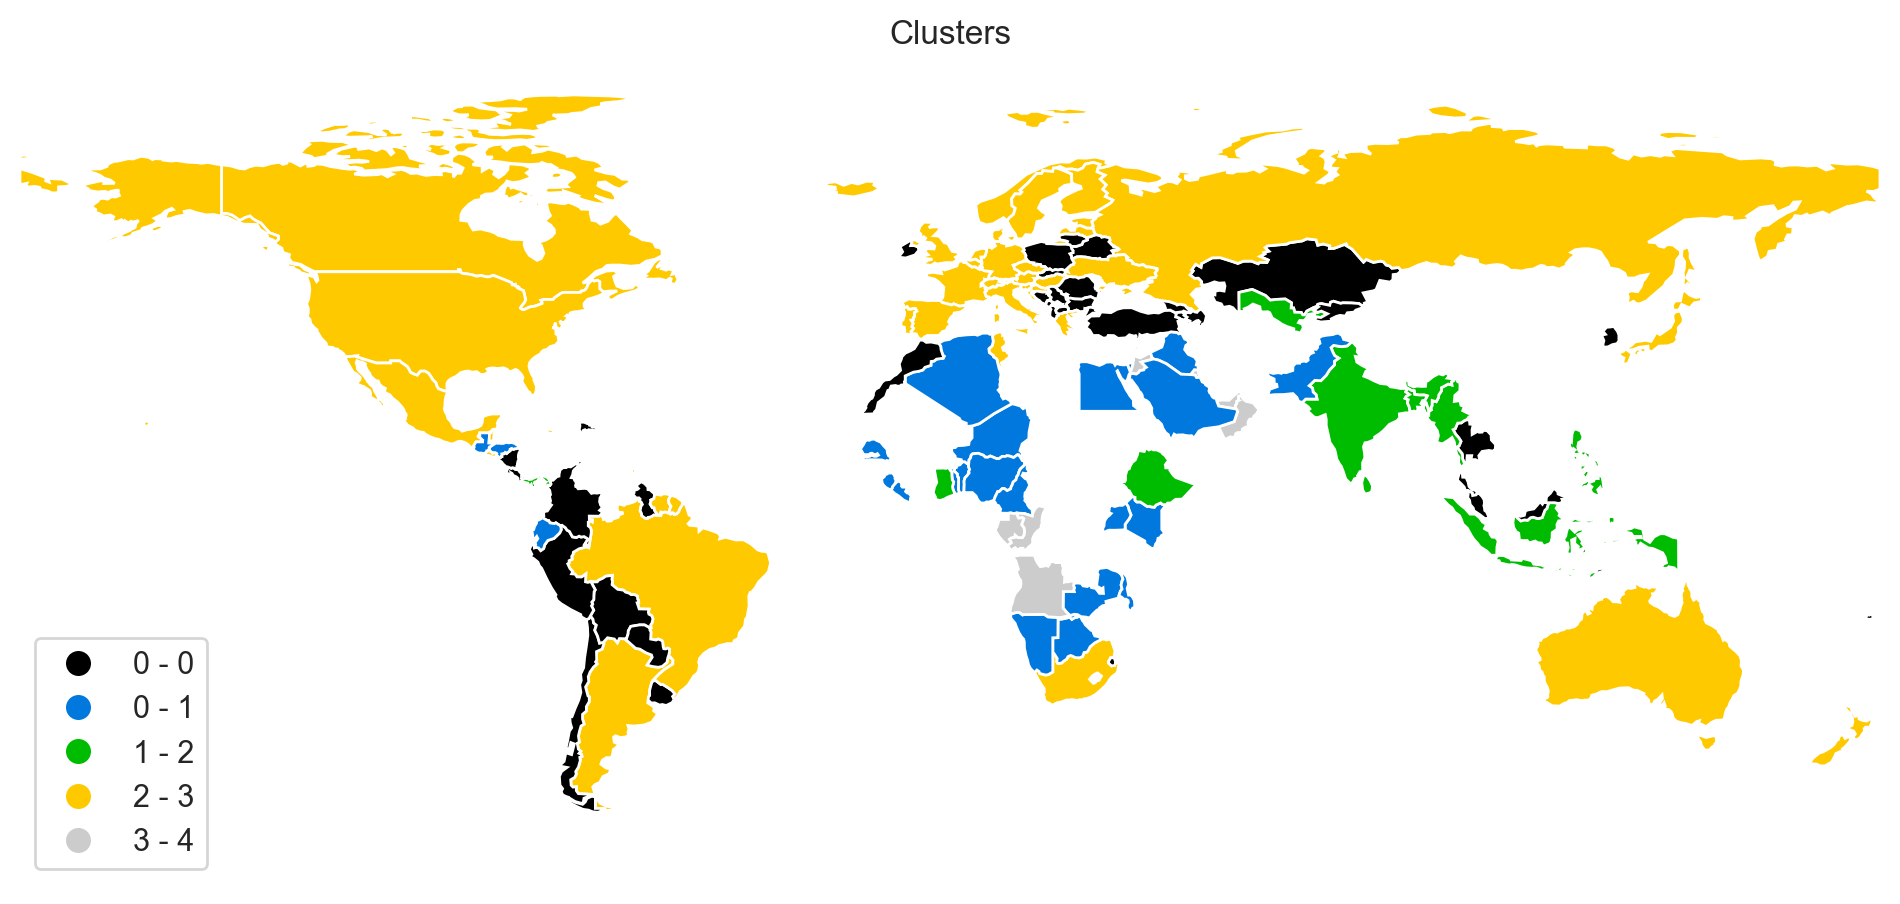

In [2369]:
geoplot.choropleth(
    df, hue='cluster', edgecolor='white', linewidth=1,
    cmap='nipy_spectral', legend=True, scheme='FisherJenks', figsize=(12, 15))
plt.title('Clusters')
plt.show()

### 5 groupes, par import-export

#### cluster 3 supprimé :
- les pays appartenant à ce groupe ont une balance excedentaire , ils font plus d'exportations que d'importations 


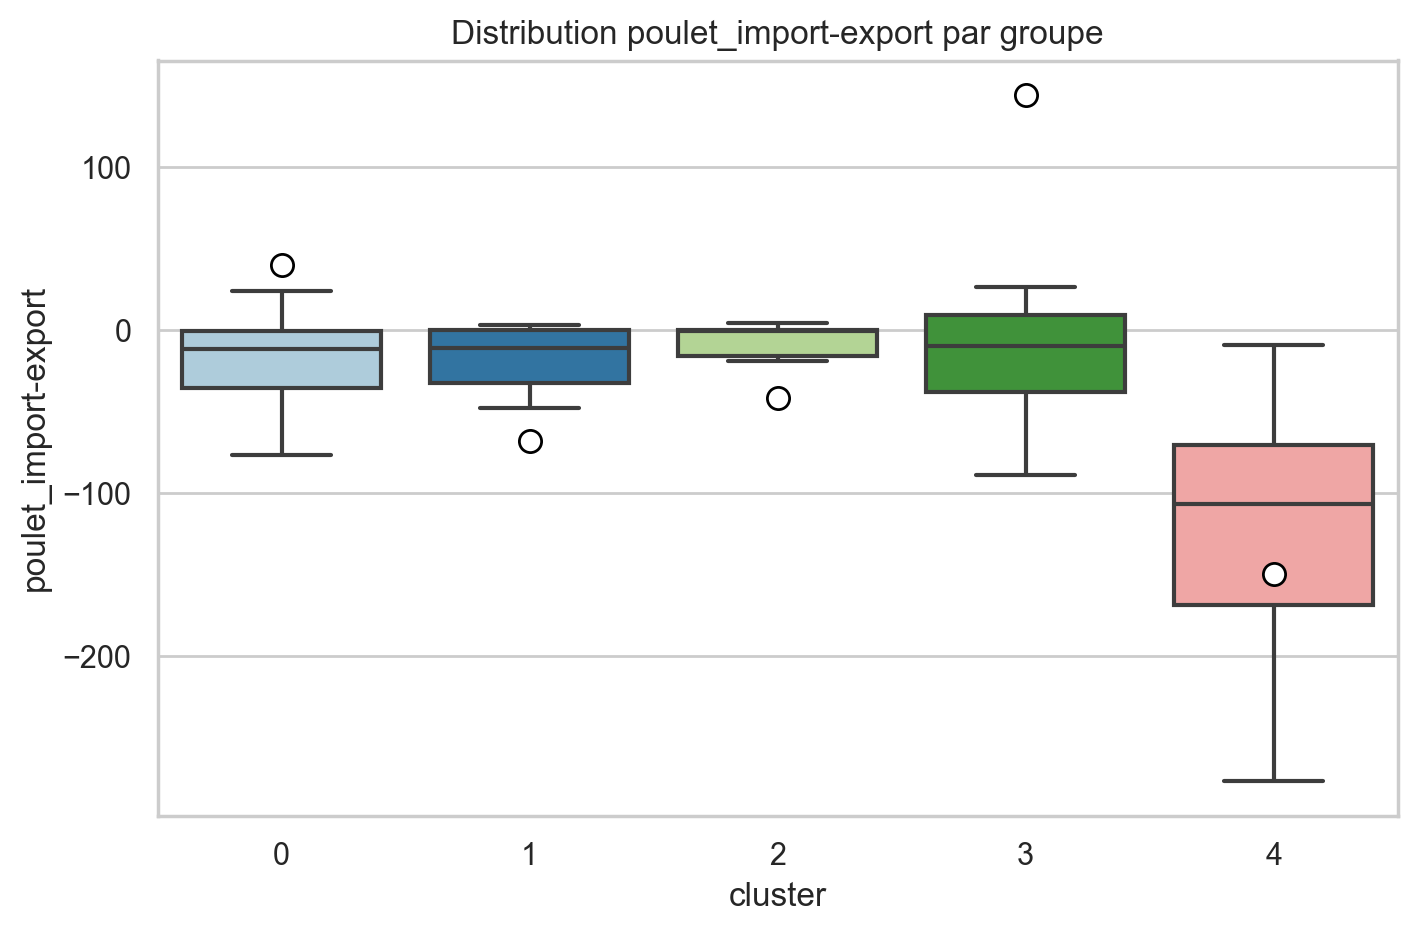

In [2370]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=df, y='poulet_import-export', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Distribution poulet_import-export par groupe')
plt.show()

In [2371]:
print('Cluster à mettre de côté :', df[df['cluster']==3]['pays'].unique())
quatre_groupes = df.drop(df[df['cluster']==3].index)
#quatre_groupes = quatre_groupes.drop(quatre_groupes[quatre_groupes['cluster']==1].index)


Cluster à mettre de côté : ['Canada' 'United States of America' 'Argentina' 'Russian Federation'
 'Norway' 'South Africa' 'Mexico' 'Brazil' 'El Salvador' 'Belize'
 'Suriname' 'France' 'Jamaica' 'Tunisia' 'Sweden' 'Ukraine' 'Austria'
 'Hungary' 'Latvia' 'Estonia' 'Germany' 'Greece' 'Croatia' 'Switzerland'
 'Luxembourg' 'Belgium' 'Netherlands' 'Portugal' 'Spain' 'New Zealand'
 'Australia' 'Italy' 'Denmark'
 'United Kingdom of Great Britain and Northern Ireland' 'Iceland'
 'Slovenia' 'Finland' 'Czechia' 'Japan' 'Cyprus' 'Trinidad and Tobago']


### 4 groupes , par indicateur de  pib

#### cluster 4 supprimé :
- les pays appartenant à ce groupe ont une croissance PIB faible 


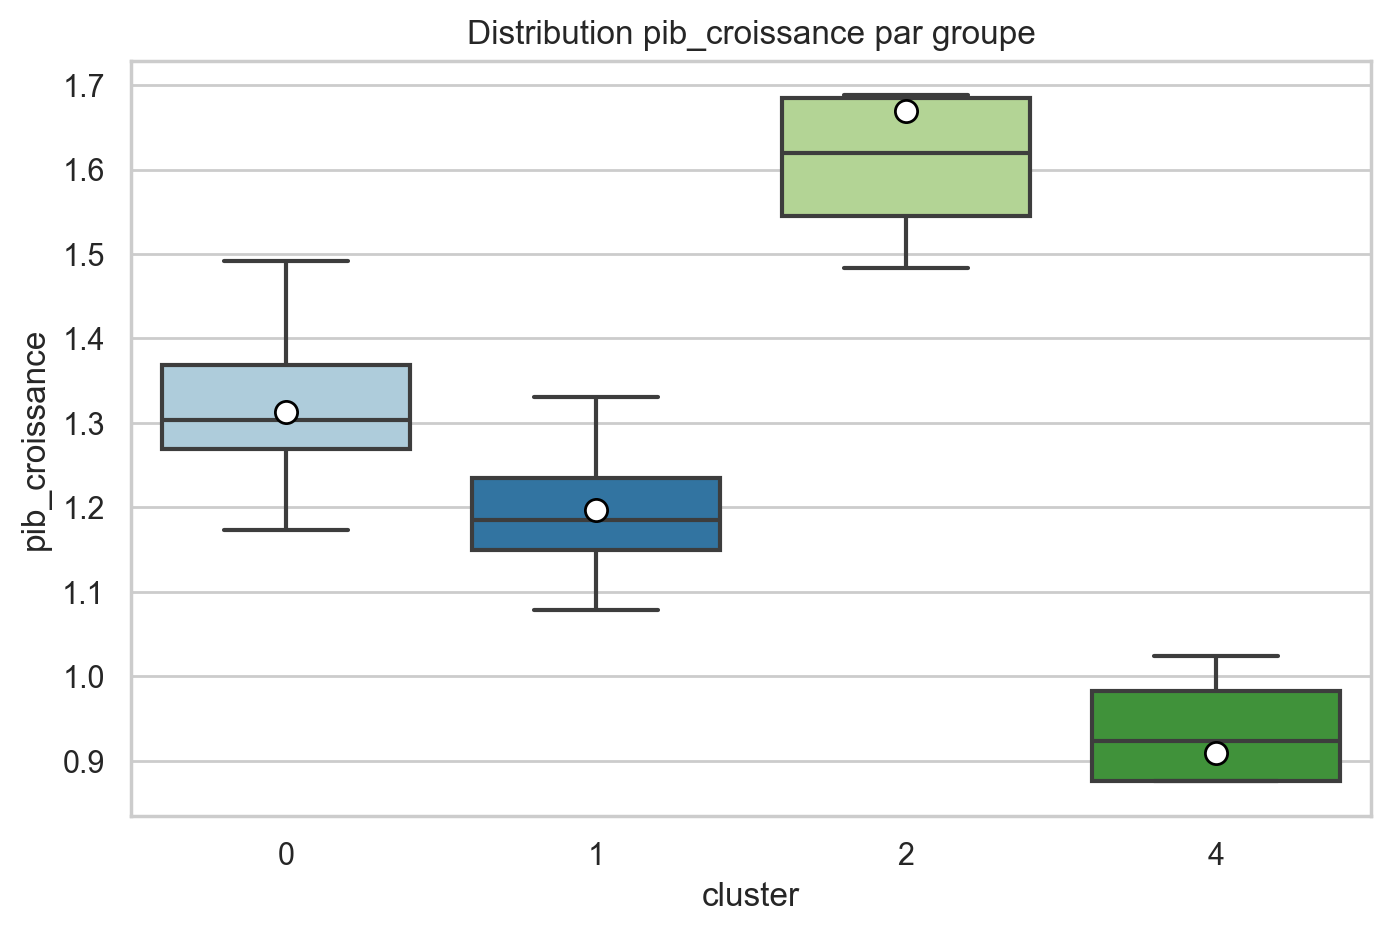

In [2372]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=quatre_groupes, y='pib_croissance', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Distribution pib_croissance par groupe')
plt.show()

In [2373]:
print('Cluster à mettre de côté :', quatre_groupes[quatre_groupes['cluster']==4]['pays'].unique())
trois_groupes = quatre_groupes.drop(quatre_groupes[quatre_groupes['cluster']==4].index)

Cluster à mettre de côté : ['Congo' 'Gabon' 'Angola' 'Lebanon' 'Jordan' 'United Arab Emirates'
 'Kuwait' 'Oman']


### 3 groupes, par croissance demographique

#### cluster 0 supprimé :
- les pays qui appartiennent au cluster 0 ont une croissance population faible

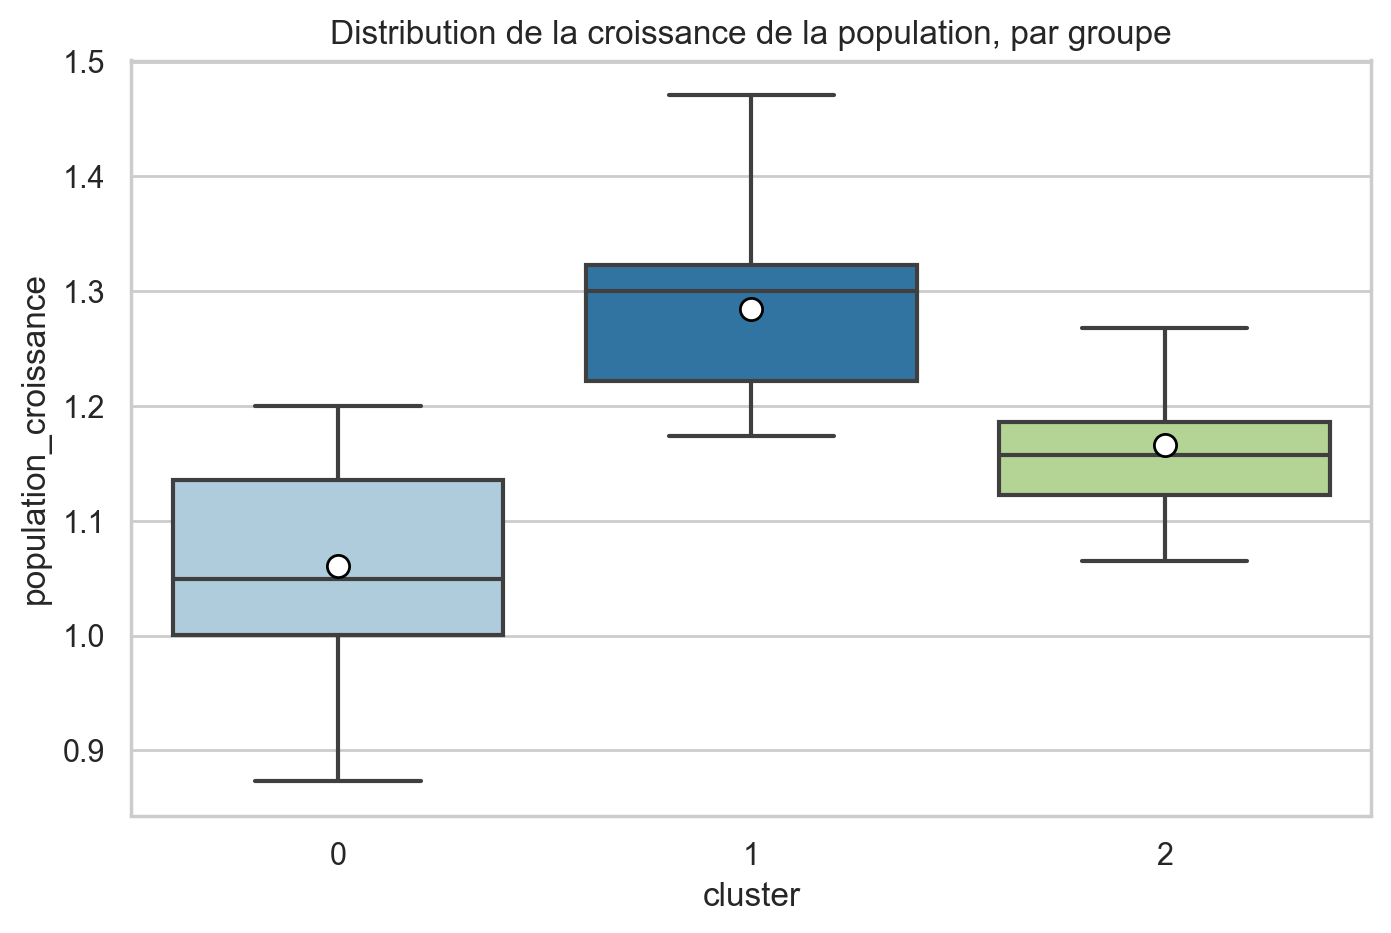

In [2374]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=trois_groupes, y='population_croissance', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Distribution de la croissance de la population, par groupe')
plt.show()

In [2375]:
print('Cluster à mettre de côté :', trois_groupes[trois_groupes['cluster']==0]['pays'].unique())
groupe_km = trois_groupes.drop(trois_groupes[trois_groupes['cluster']==0].index)
#groupe_km = groupe_km.drop(groupe_km[groupe_km['cluster']==3].index)

Cluster à mettre de côté : ['Fiji' 'Kazakhstan' 'Chile' 'Dominican Republic' 'Timor-Leste' 'Uruguay'
 'Bolivia (Plurinational State of)' 'Peru' 'Colombia' 'Costa Rica'
 'Nicaragua' 'Guyana' 'Eswatini' 'Thailand' 'Republic of Korea'
 'Kyrgyzstan' 'Armenia' 'Belarus' 'Poland' 'Romania' 'Lithuania'
 'Bulgaria' 'Turkey' 'Albania' 'Ireland' 'Azerbaijan' 'Georgia' 'Malaysia'
 'Slovakia' 'Paraguay' 'Morocco' 'Bosnia and Herzegovina'
 'North Macedonia' 'Serbia' 'Montenegro']


In [2376]:
# Liste des pays (33 pays)
groupe_km

,continent,pays,iso_a3,geometry,dispo_calories,dispo_proteines,dispo_int,dispo_kg,population,population_croissance,pib,pib_croissance,poulet_import-export,PC1,PC2,cluster
4,Asia,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",7.0,0.71,67.0,2.11,31.959785,1.174789,6518.8,1.671016,-8.0,0.451498,0.120025,2
5,Asia,Indonesia,IDN,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",27.0,2.59,2049.0,7.74,264.650963,1.138900,10935.6,1.494057,-1.0,0.307066,0.059992,2
8,Africa,Kenya,KEN,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",7.0,0.72,107.0,2.12,50.221142,1.297505,4046.2,1.256077,0.0,0.025360,0.159854,1
20,North America,Panama,PAN,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",117.0,10.29,192.0,33.72,4.106769,1.189101,30446.8,1.591940,-19.0,0.371142,0.118205,2
23,North America,Honduras,HND,"POLYGON ((-83.14722 14.99583, -83.48999 15.016...",93.0,6.94,204.0,21.58,9.429013,1.207529,5562.0,1.131799,-11.0,-0.076506,0.047886,1
25,North America,Guatemala,GTM,"POLYGON ((-92.22775 14.53883, -92.20323 14.830...",68.0,5.85,354.0,19.67,16.914970,1.234640,8322.2,1.144858,-122.0,-0.068652,0.077592,1
30,South America,Ecuador,ECU,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...",87.0,6.46,340.0,20.28,16.785361,1.174084,11617.9,1.184811,0.0,-0.019070,0.025031,1
32,Africa,Botswana,BWA,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827...",11.0,1.18,7.0,3.37,2.205080,1.175755,17253.7,1.227890,-3.0,0.019202,0.033507,1
33,Africa,Namibia,NAM,"POLYGON ((19.89577 -24.76779, 19.89473 -28.461...",39.0,4.18,27.0,11.36,2.402633,1.197417,10171.4,1.164349,-17.0,-0.046692,0.042442,1
34,Africa,Senegal,SEN,"POLYGON ((-16.71373 13.59496, -17.12611 14.373...",21.0,2.09,96.0,6.20,15.419355,1.319351,3203.9,1.163278,0.0,-0.069105,0.163064,1


## Comparaison des  deux méthodes de clustering 

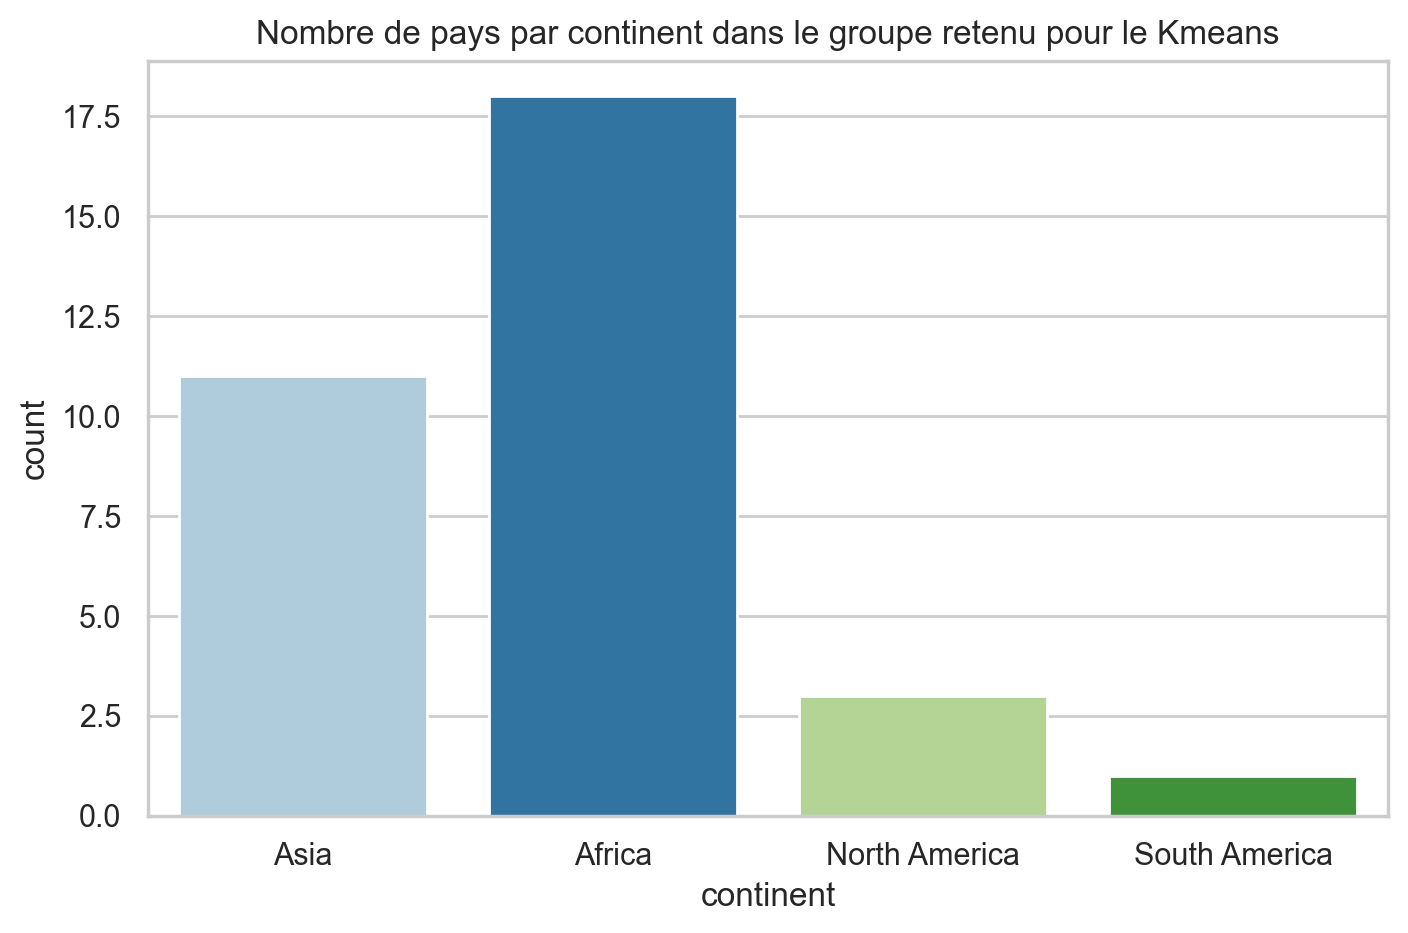

In [2377]:
sns.countplot(data=groupe_km, x='continent')
plt.title('Nombre de pays par continent dans le groupe retenu pour le Kmeans')
plt.show()


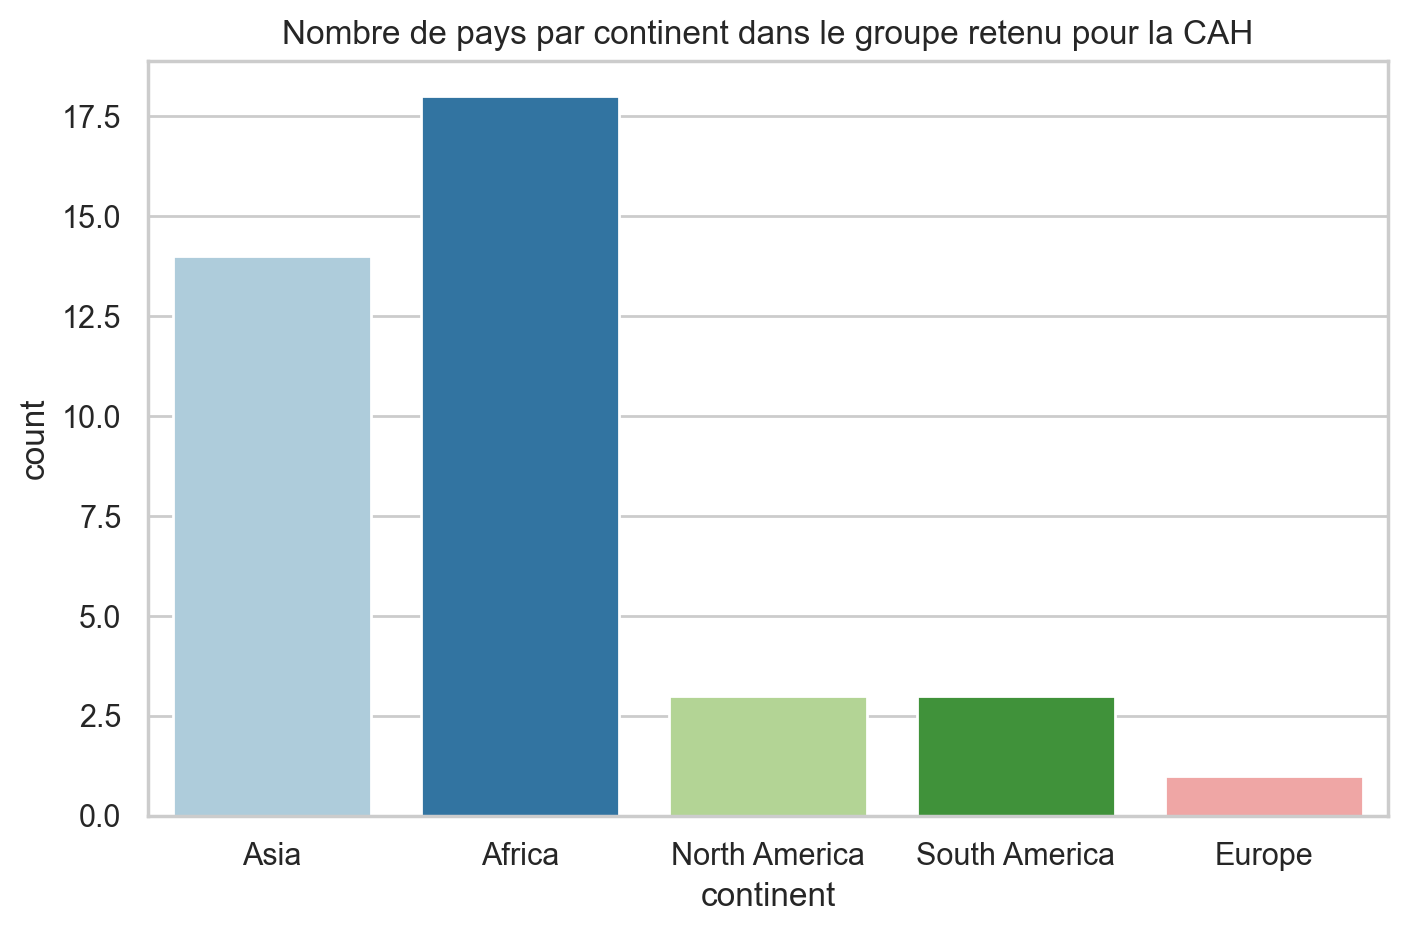

In [2378]:
sns.countplot(data=groupe, x='continent')
plt.title('Nombre de pays par continent dans le groupe retenu pour la CAH')
plt.show()

### Conclusion

### Les resultas des deux methodes de clustering montrent que les continents Asiatique et Africain présentent plus de pays ciblés et une partie des pays du South America .